# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.  
Исследуем предоставленные данные для определения рыночной стоимости объектов недвижимости.  
Для этого установим параметры, которые влияют на стоимость . Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. Для этого:

- исследуем предоставленный датасет,  
- проверим на наличие пропусков, дупликатов, аномалий,  
- построим диаграммы для каждого параметра,  
- найдем закономерности влияния параметров на стоимость квадратного метра,  
- посмотрим, сколько времени обычно занимала продажа,  
- посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений,  
- вычислим среднюю цену в зависимости от расстояния до центра в г. Санкт-Петербург.

## Открытие файла и изучение данных 

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
print ('Библиотеки загружены корректно.')

Библиотеки загружены корректно.


In [2]:
# открытие файла
data = pd.read_csv('real_estate_data.csv', sep = '\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,3700000.00,37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,False,False,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,False,False,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN
8,20,2900000.00,33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,5400000.00,61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,False,False,6.50,2.00,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00


In [3]:
# основная информация по датасету
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Таблица состоит из 23699 строк и 22 столбцов. В некоторых колонках наблюдается меньше значений, чем должно быть, значит, в этих колонках имеются нулевые значения, которые мы изучим на шаге "Предобработка данных". 

Имеются четыре типа ячеек: булевые, вещественные, целочисленные и текстовые.

Описание ячеек:

`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)  
`balcony` — число балконов  
`ceiling_height` — высота потолков (м)  
`cityCenters_neares` — расстояние до центра города (м)  
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)  
`first_day_exposition` — дата публикации  
`floor` — этаж  
`floors_total` — всего этажей в доме  
`is_apartment` — апартаменты (булев тип)  
`kitchen_area` — площадь кухни в квадратных метрах (м²)  
`last_price` — цена на момент снятия с публикации  
`living_area` — жилая площадь в квадратных метрах (м²)  
`locality_name` — название населённого пункта  
`open_plan` — свободная планировка (булев тип)  
`parks_around3000` — число парков в радиусе 3 км  
`parks_nearest` — расстояние до ближайшего парка (м)  
`ponds_around3000` — число водоёмов в радиусе 3 км  
`ponds_nearest` — расстояние до ближайшего водоёма (м)  
`rooms` — число комнат  
`studio` — квартира-студия (булев тип)  
`total_area` — общая площадь квартиры в квадратных метрах (м²)  
`total_images` — число фотографий квартиры в объявлении  

Названия колонок составлены корректно.

Изучим диаграммы, построенные для каждого числового столбца датасета

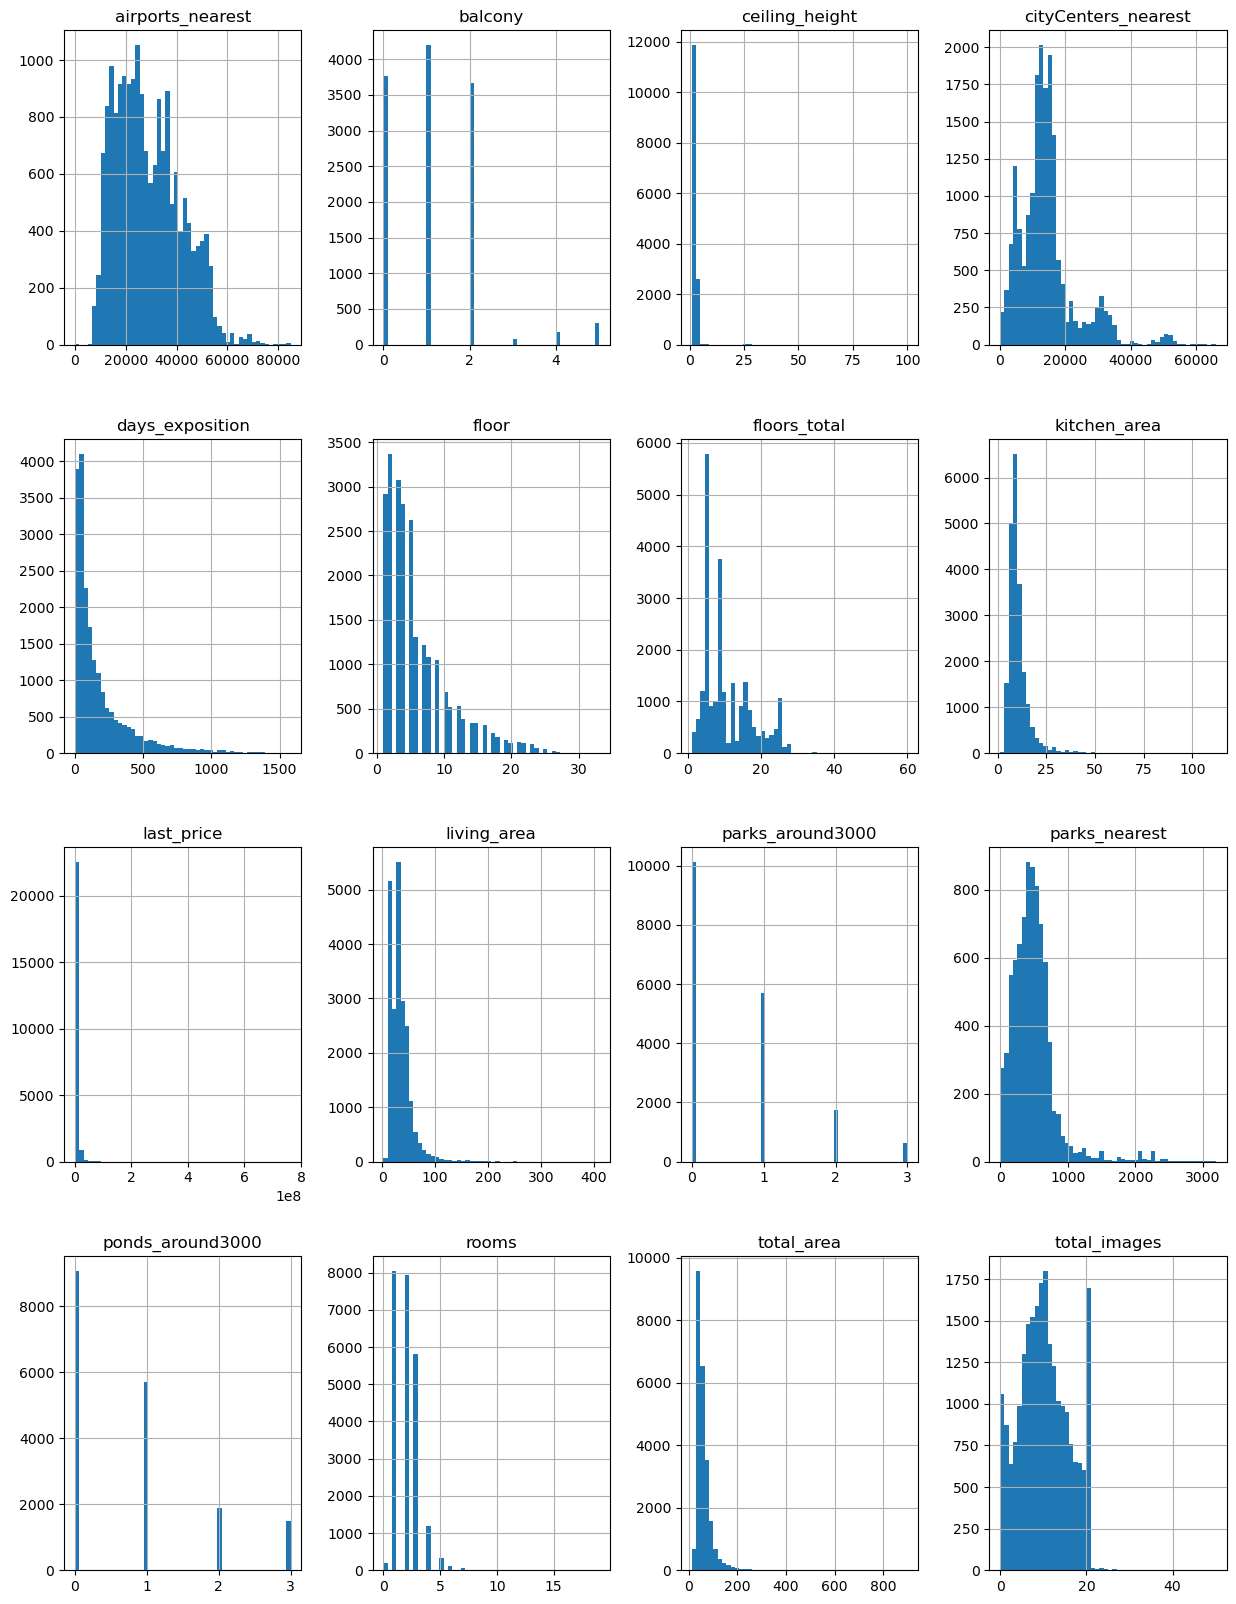

In [4]:
data[['airports_nearest',
 'balcony',
 'ceiling_height',
 'cityCenters_nearest',
 'days_exposition',
 'floor',
 'floors_total',
 'kitchen_area',
 'last_price',
 'living_area',
 'locality_name',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'rooms',
 'total_area',
 'total_images']].hist(figsize=(15, 20),bins = 50);

Из 22 колонок построено 16 диаграмм. На первый взгляд на всех гистограммах отмечается скопление значений в левой части графиков и идет вправо на убывание. Это значит, что с увеличением числового показателя, количество значений уменьшается.

**Выводы**

В каждой строке таблицы — данные, указанные о продаже квартиры. Часть колонок описывает саму квартиру: площадь, число комнат, этаж, планировка и тп. Часть данных получена на основе картографических данных: расстояние до центра города, до аэропорта, до ближайшего парка, до бижайшего водоема, число водоемов и парков в округе. И есть информация об объявленнии: дата публикации, длительность публикации, цена на момент снятия с публикации, число фотографий квартиры. 

Предварительно можно утверждать, что данных достаточно для обработки. Но встречаются пропуски в данных, и несоответствия типов ячеек с содержащимися в них данными.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

### Обработка пропусков

In [5]:
# количество пропущенных значений для каждого столбца
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
# визуализация пропущенных значений
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
        )
        plt.title('Заполненность данными', fontsize = 24)
        plt.xlabel('Заполненные данные, %', fontsize = 16)
        plt.ylabel('Название колонки', rotation=90, fontsize = 16);    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

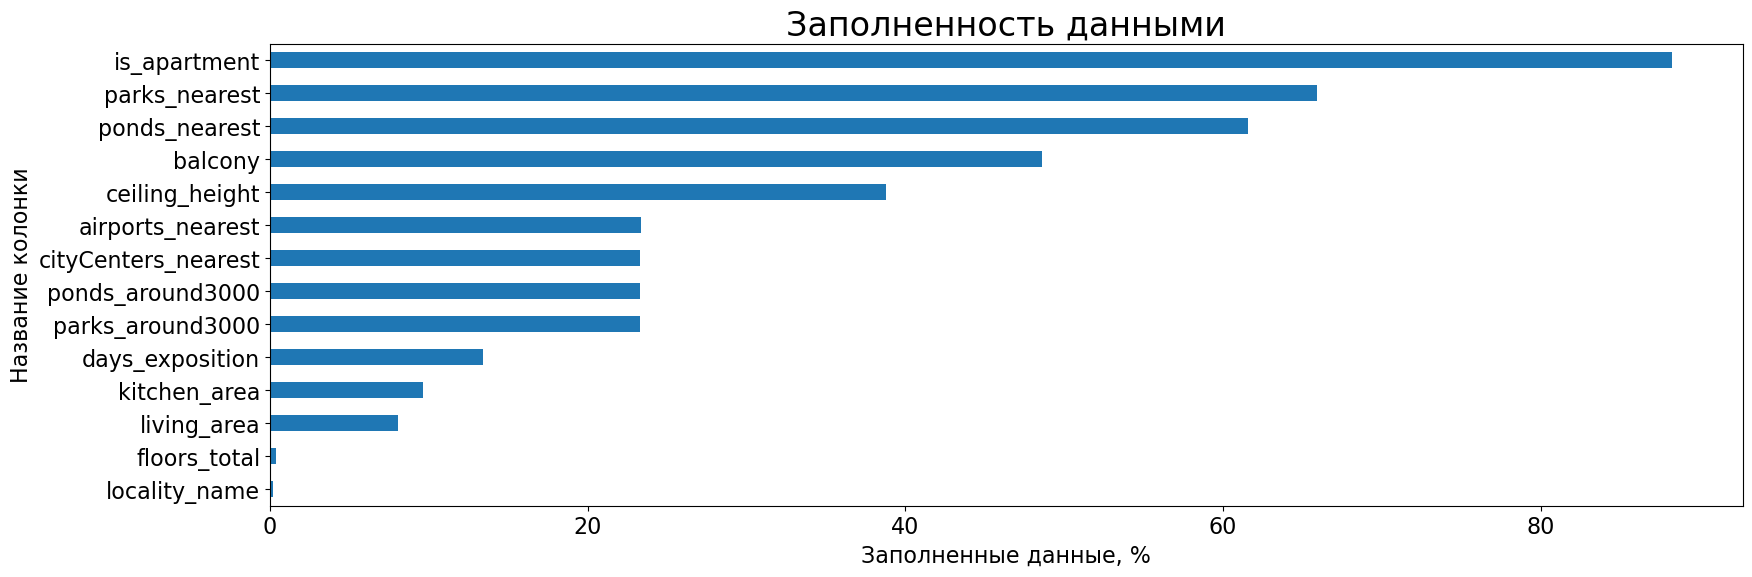

In [7]:
pass_value_barh(data)

Из 22 колонок - 14 колонок с пропущенными значениями.  
Изучим каждую и, где это возможно, избавимся от нулевых значений.

`ceiling_height` (высота потолков (м)) - отсутствие значений может объясняться человеческим фактором, при заполнении объявления не указали высоту потолков. Так как пропущенных значений больше половины, замена на среднее или медиану может исказить общие характеристики столбца. Оставим эти данные без изменений.

`floors_total` (всего этажей в доме) - также отсутствие информации может говорить о том, что ее не заполнили. Таких значений немного: 86 из 22 тыс. Заменить пустые значения на другие значения или на нули будет некорректным решением, поэтому удалим эти строки из датасета.

`is_apartment` (является ли квартира апартаментами) - скорее всего пропущенное значение означает, что квартира не является апартаментом, заменим пустые ячейки на 0

`kitchen_area` (площадь кухни) - высчитывать коэффициент соотношение кухни к общей площади, а потом применить для нулевых значений нецелесообразно, т.к. из жизненного опыта площадь кухни в однокомнатной и в четырехкомнатной квартире может быть одинаковой. А кухня в однокомнатных квартирах может отличаться в 2 раза. Принято решение оставить данные без изменений.

`parks_around3000` и `ponds_around3000` (число парков и водоемов в радиусе 3 км) - если нет значения, значит, возможно, и нет рядом парка или водоема, поставим эти данные равными 0.

`balcony` (количество балконов) - можно предположить, если значение отстутствует, это означает, что в квартире нет балконов, заменим значения на нули.
    

`days_exposition` (количество дней публикации) - количество пустых значений существенно (3181), поэтому удалять их будет не правильным. Необходимо узнать у создателей датасета, почему в этом столбце стоят пропуски. Но так как сейчас это не представляется возможным, будем предполагать, что объявления еще не закрыты и поэтому количество дней не посчитано. Если мы эти значения заменим на нулевые, то это нам помешает для дальнейшего анализа, оставим эти значения без изменений.

`airports_nearest`, `cityCenters_nearest`, `parks_nearest`, (расстояния до аэропорта, центра города, парка (м)) - нулевые значения в этих столбцах нет возможности поменять на 0 или на другие значения, т.к. такие расстояния зависят только от расположения объекта. Оставим эти столбцы в првоначальном виде.

`ponds_nearest (расстояние до водоема)` - не участвует анализе, удалим всю колонку.

`locality_name` (название населенного пункта) - узнать названия населенных пунктов не имеется возможности, таких значений всего 49, влиять они на анализ данных не будут, поэтому удалим строки с этими значениями.

In [8]:
# замена пропущенных значений на 0
columns_to_replace = ['is_apartment', 'parks_around3000', 'ponds_around3000', 'balcony']
for column in columns_to_replace:
    data[column] = data[column].fillna(0)

data.pop('ponds_nearest') # удаление колонки о близости водоемов
data = data.dropna(subset = ['floors_total']) # удаление строк с количеством этажей в доме
data = data.dropna(subset = ['locality_name']) # удаление строк с названием населеных пунктов

`living_area` (жилая площадь) - т.к. нулевых значений достаточно много (1903 из 23699), оставлять их пустыми будет некорректно. Изучим количественные характеристики столбца. 

In [9]:
data['living_area'].describe()

count   21700.00
mean       34.45
std        22.05
min         2.00
25%        18.60
50%        30.00
75%        42.30
max       409.70
Name: living_area, dtype: float64

По показателям видно, что в данных указаны жилые площади в 2 кв.м. По нормативам, жилая площадь должна быть не менее 9.кв.м. Посмотрим, сколько таких зачений существует в датасете.

In [10]:
#определяем количество строк c жилой площадью менее 9 кв.м.
data[data['living_area']<9]['living_area'].count()

14

Их количество совсем невелико, не повлияет на расчеты, вернемся к ним в разделе "Обработка аномальных значений"

Т.к. в датасете известны все значения общей площади квартир, заменим пустые значения на процентное отношение средней жилой площади к средней общей площади.

In [11]:
#найдем коэффициент отношения жилой площади к общей площади квартиры
koef = data[data['living_area'] != 0]['living_area'] / data[data['living_area'] != 0]['total_area']
koef.describe() #выведем количественные характеристики полученного коэффициента

count   21700.00
mean        0.56
std         0.11
min         0.02
25%         0.50
50%         0.57
75%         0.64
max         1.00
dtype: float64

Рассматривая характеристики коэффициента, можно заметить, что есть аномальные показатели, где отношение равно 1, т.е. общая и жилая площадь равны, чего в реальной жизни не должно быть. Минимальный коэффициент равен 0,02, говорит, о том, что жилая площадь является очень малой по сравнению с общей. Для расчетов возьмем медиану коэффициента, т.к. она наиболее правдоподобно показывает отношение жилой площади к общей и не учитывает разброс аномальных значений. 

In [12]:
#заменяем пустые значения на произведение общей площади и коэффициента
data['living_area'] = data['living_area'].fillna(data['total_area'] * koef.median()) 

In [13]:
# проверка
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
days_exposition          3171
dtype: int64

**Вывод**: Проанализировав все колонки с пустыми значениями были сделаны следующие замены:

- `floors_total` (всего этажей в доме) - удалены строки с пустыми значениями;
- `living_area` (жилая площадь) - заменены на расчетную площадь;
- `is_apartment` (является ли квартира апартаментами) - заменены на 0;
- `balcony` (количество балконов) - заменены на 0;
- `locality_name` (название населенного пункта) - удалены строки с пустыми значениями;
- `parks_around3000` (число парков в радиусе 3 км) - заменены на 0;
- `ponds_around3000` (число водоемов в радиусе 3 км) - заменены на 0;
- `ponds_nearest` (расстояние до водоема) - удалена полностью.

Заменить пустые значения в колонках высота потолков, площадь кухни, количество дней экспозиции, расстояние до центра города, аэропорта, парка на другие значения является нецелесобразным и может повлиять на окончательный результат, поэтому эти колонки оставлены без изменений.

### Изменение типов данных

Поменяем типы данных там, где они не соответствуют содержанию ячеек.

`first_day_exposition` (дата публикации) - в ячейках указана дата, а тип данных стоит float, необходимо поменять на тип datetime  
`is_apartment` (является ли апартаментами) - предполагает булево значение да(True) или нет(False). Изменим тип ячейки на правильный - bool  
`floors_total`, `parks_around3000`, `ponds_around3000`, `balcony` сделаем целочисленными.

In [14]:
# изменение типов данных
columns_to_replace = ['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000']
for column in columns_to_replace:
    data[column] = data[column].astype(int)

data['is_apartment'] = data['is_apartment'].astype(bool)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

Посмотрим еще раз на общую информацию о датасете.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

Теперь стоят корректные типы данных, которые соответствуют содержанию столбцов

**Вывод**: проанализировав соответствие типов данным столбцов датасета и содержащихся в них значений, были проведены следующие корректировки:

- `first_day_exposition` - тип float заменен на тип datetime;
- `is_apartment`  - тип object заменен на тип bool;
- `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000` - тип float заменен на тип int.

### Обработка дубликатов

**Проверим, есть ли полностью повторяющиеся строки**

In [16]:
data.duplicated().sum()

0

Явных дубликатов в датасете нет. Поищем неявные дубликаты

In [17]:
# список наименований населенных пунктов.
data.sort_values(by = 'locality_name')['locality_name'].unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

При изучении уникальных значений столбца наименований населенных пунктов можно заметить, что некоторые наименования совпадают, но не совпадает тип насленного пункта, например, "поселок..."-"посёлок...", "городской поселок..." - "поселок городского типа...". Будем считать, что городской поселок и поселок городского типа - это одно и то же. Объединим эти наименования под одним названием "поселок городского типа". Также объединим заменим "посёлок" на "поселок".

Наименование **Федоровское** встречается два раза: городской поселок Федоровское и деревня Федоровское. На карте Ленинграской области существует только городской поселок Федоровское, поэтому объединим эти два наименования.

**Мурино** и поселок Мурино на карте - одно и то же. Заменим одно название на другое.

**Гарбалово** на карте есть только деревня, поселка Гарбалово не существует. Объединим.

**Приладожский** есть поселок городского типа, но не существует садового товарищества. Заменим.

**Вещево** является поселком железнодорожной станции, а не поселок станции. Заменим на правильное название.

То же самое и с **Приветнинским**, является поселком при железнодорожной станции, а не поселком станции.

Изменим эти значения.

Остальные повторяющиеся названия проанализированы и проверены, что это разные типы поселений, расположенные в разных районах Ленинградской области, имеющие одно название. Например, существует село Павлово и городской поселок Павлово, расположены в разных районах Ленинградской области, а значит, являются абсолютно разными населенными пунктами, объединять их будет неправильным решением. Поэтому такие наименования оставим, как есть.

In [18]:
data['locality_name'] = data['locality_name'].replace('ё', 'е', regex=True)
data['locality_name'] = data['locality_name'].replace('городской поселок', 'поселок городского типа', regex=True)
data['locality_name'] = data['locality_name'].replace('деревня Федоровское', 'городской поселок Федоровское')
data['locality_name'] = data['locality_name'].replace('поселок Мурино', 'Мурино')
data['locality_name'] = data['locality_name'].replace('поселок Гарболово', 'деревня Гарболово')
data['locality_name'] = data['locality_name'].replace('садовое товарищество Приладожский', 'поселок городского типа Приладожский')
data['locality_name'] = data['locality_name'].replace('поселок станции Вещево', 'поселок при железнодорожной станции Вещево')
data['locality_name'] = data['locality_name'].replace('поселок станции Приветнинское', 'поселок при железнодорожной станции Приветнинское')
data.sort_values(by = 'locality_name')['locality_name'].unique() # проверка

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Федоровское', 'деревня Агалатово',
       'деревня Аро', 'деревня Батово', 'деревня Бегуницы',
       'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       '

Названия заменились на корректные.

**Выводы:**  Проведена проверка на дубликаты, повторяющиеся названия населенных пунктов устранены.

### Поиск и обработка аномальных значений

Проанализируем каждый столбец на наличие аномальных значений.

In [19]:
# выведем характеристики каждого столбца

data[['days_exposition', 'total_area', 'rooms', 'ceiling_height', 'last_price', 'living_area',  'kitchen_area',\
          'floor', 'floors_total']]\
    .describe(percentiles=[0.0012, 0.01, .5, .99, .9988])

,days_exposition,total_area,rooms,ceiling_height,last_price,living_area,kitchen_area,floor,floors_total
count,20394.00,23565.00,23565.00,14481.00,23565.00,23565.00,21343.00,23565.00,23565.00
mean,180.74,60.32,2.07,2.77,6540058.26,34.58,10.56,5.88,10.68
std,219.73,35.66,1.08,1.26,10910934.72,22.36,5.90,4.87,6.59
min,1.00,12.00,0.00,1.00,12190.00,2.00,1.30,1.00,1.00
0.1%,3.00,20.00,0.00,2.30,561384.00,9.29,3.80,1.00,2.00
1%,4.00,25.32,1.00,2.50,1000000.00,13.00,5.00,1.00,2.00
50%,95.00,52.00,2.00,2.65,4646000.00,30.00,9.10,4.00,9.00
99%,1067.14,197.45,5.00,3.82,36000000.00,122.00,35.03,23.00,26.00
99.9%,1370.64,380.00,8.00,25.00,124856064.00,229.25,60.00,26.00,35.00
max,1580.00,900.00,19.00,100.00,763000000.00,409.70,112.00,33.00,60.00


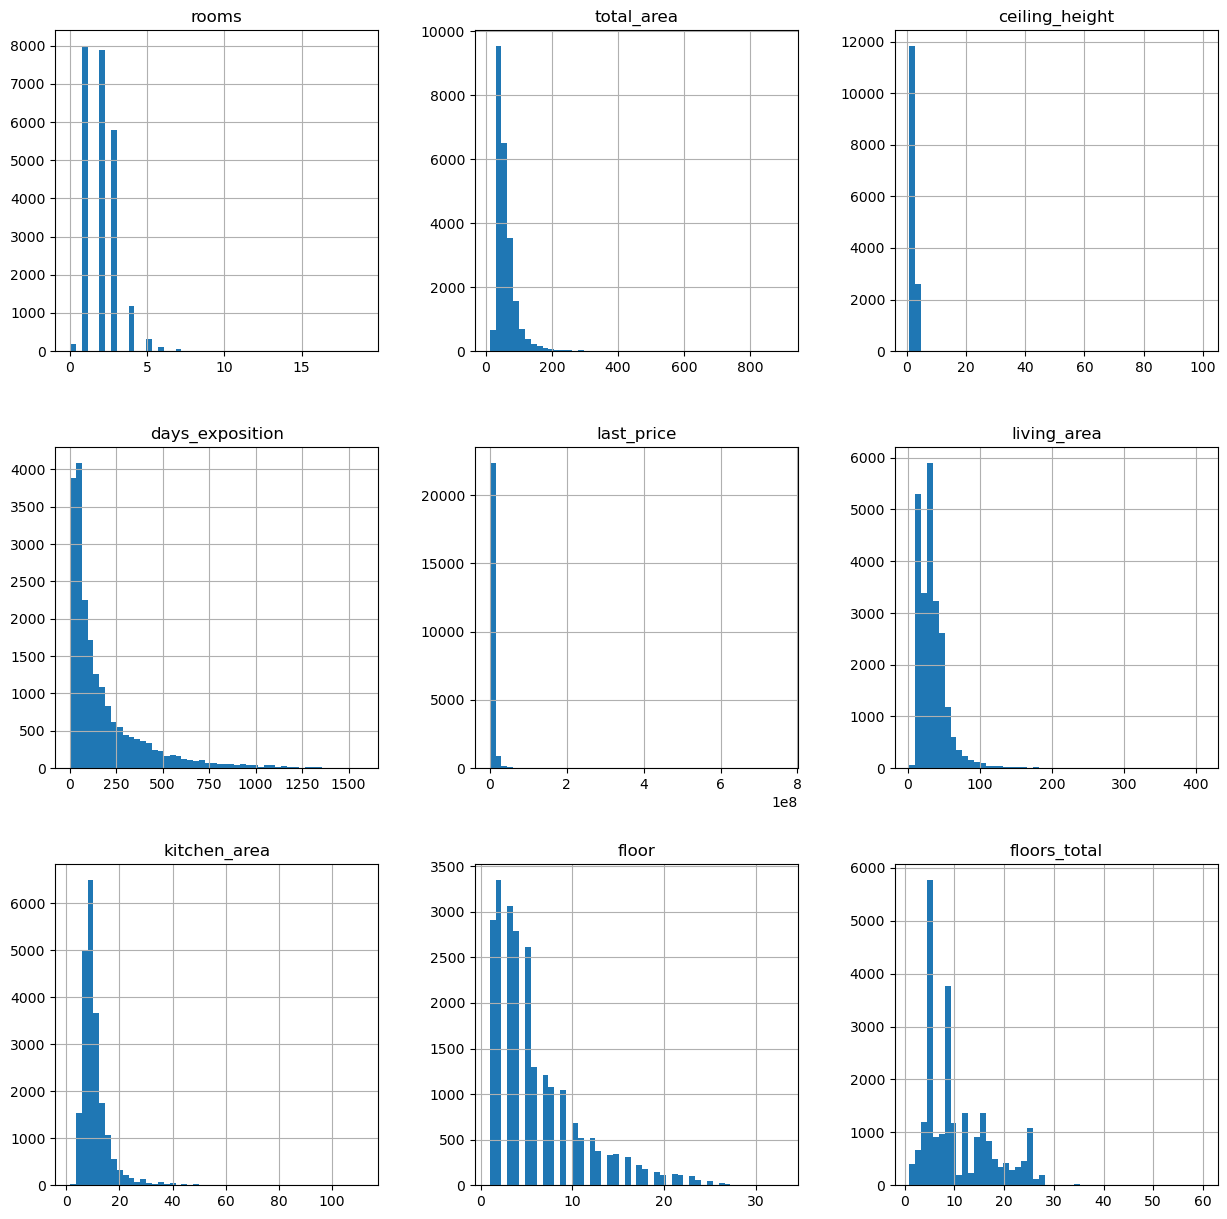

In [20]:
data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]\
     .hist(figsize=(15, 15),bins = 50);

Для столбца **`total_area`** аномальными будем считать значения ниже 0.1 и выше 99 процениля, По графику видно значительное уменьшение объявлений с площадями более ~200 кв.м. На счет минимального значения логично предположить, что значения меньше 20 кв.м. маловероятны и являются выбросами. Удалим аномальные значения.

In [21]:
data= data.loc[data['total_area']<197.45]
data= data.loc[data['total_area']>20]

Рассмотри колонку **`rooms`** — количество комнат. По выведенным данным видим, что есть объявления, в которых количество комнат стоит равное 0. Это подозрительно, потому что в квартире должна быть хоть одна комната. Посмотрим сколько таких значений.

In [22]:
data[data['rooms'] == 0]['rooms'].count()

183

183 квартиры без комнат. Это существенное число. Возможно, 0 комнат указали в квартирах студиях или в квартирах апартаментах или в квартирах со свободной планировкой. Проверим.

In [23]:
# выведем количество квартир с нулевым количеством комнат каждого типа согласно гипотезе
print('Количество квартир без комнат в зависимости от типа квартиры:')
print('Студия:', data[(data['rooms']==0) & (data['studio'] == True)]['rooms'].count())
print('Свободная планировка:', data[(data['rooms']==0) & (data['open_plan'] == True)]['rooms'].count())
print('Апартаменты:', data[(data['rooms']==0) & (data['is_apartment'] == True)]['rooms'].count())
print('Ни студия, ни свободная планировка, ни апартаменты',data[(data['rooms']==0) & \
    (data['is_apartment'] == False) & (data['open_plan'] == True) & (data['studio'] == True)]['rooms'].count())

Количество квартир без комнат в зависимости от типа квартиры:
Студия: 127
Свободная планировка: 56
Апартаменты: 0
Ни студия, ни свободная планировка, ни апартаменты 0


Наше предположение потвердилась. Действительно, 0 комнат указали в квартирах студиях или в квартирах со свободной планировкой. В сумме они как раз и дают 183 (127+56). Для того, чтобы решить, что делать с нулевым количеством комнат. Посмотрим, сколько вообще квартир-студий и квартир со свободной планировкой в датасете.

In [24]:
print('Количество квартир-студий:', data[data['studio'] == True]['rooms'].count())
print('Количество квартир со свободной планировкой:', data[data['open_plan'] == True]['rooms'].count())

Количество квартир-студий: 138
Количество квартир со свободной планировкой: 64


Из 138 квартир-студий 127 квартира указана с нулем комнат. Будет правильно и в оставшихся 11 квартирах указать 0 комнат. 
То же самое проделать с квартирами со свободной планировкой. Так мы будем знать, то квартиры без комнат - это либо квартиры-студии либо квартиры со свободной планировкой.

In [25]:
#заменим количество комнат к квартирах-студиях и в квартирах со свободной планировкой нулевыми значениями
data.loc[data['studio'] == True, 'rooms'] = 0
data.loc[data['open_plan'] == True, 'rooms'] = 0

Проверим, что во всех квартирах-студиях и во всех квартирах со свободной планировкой количество комнат указано 0.

In [26]:
print('Студия:', data[(data['rooms']==0) & (data['studio'] == True)]['rooms'].count())
print('Свободная планировка:', data[(data['rooms']==0) & (data['open_plan'] == True)]['rooms'].count())

Студия: 138
Свободная планировка: 64


Скорректировали нулевые значения в количествах комнат, что на счет максимальных значений. Удалим значения выше 99% (больше 9 комнат). Это заключение построено на жизненном опыте. Для анализа данных квартиры с таким большим количеством комнат будут искажать результаты.

In [27]:
data = data.loc[data['rooms']<9]

В столбце **`ceiling_height`** имеются аномальные значения. Т.к. высота потолков не может быть 1 метр, или 100 метров. Ограничим высоту потолков от 2.3 до 3.82 м (0.1 и 99 процентили). Значения выше 20 появились скорее всего из-за того, что не там поставили запятую: 27 на самом деле является 2.7м. Изменим значения на корректные. Остальные выбивающиеся значения заменим на медианное значение.

In [28]:
# исправляем значения выше 10
data.loc[(data['ceiling_height'] >= 10), 'ceiling_height'] =  data['ceiling_height'] / 10

#рассчитываем медиану
print('Медиана:', data['ceiling_height'].median())
      
# замена аномальных значений медианой
data.loc[(data['ceiling_height'] < 2.3) | \
         (data['ceiling_height'] > 3.82), 'ceiling_height'] = \
    data['ceiling_height'].median()

Медиана: 2.65


 **`living_area`** - оставим для анализа площади с 0.1 по 99 процентиль. Выбивающиеся значения заменим на вычисленную площадь (произведение общей площади на коэфициент отношения общей площади к жилой, который рассчитывали ранее).

In [29]:
data.loc[(data['living_area'] < 9.29), 'living_area'] =  data['total_area'] * koef.median()
data.loc[(data['living_area'] > 122), 'living_area'] =  data['total_area'] * koef.median()

Для столбца **`kitchen_area`** выберем диапазон для анализа - значения от 3.8 до 60 кв.м (0.1 - 99.9 процентили).

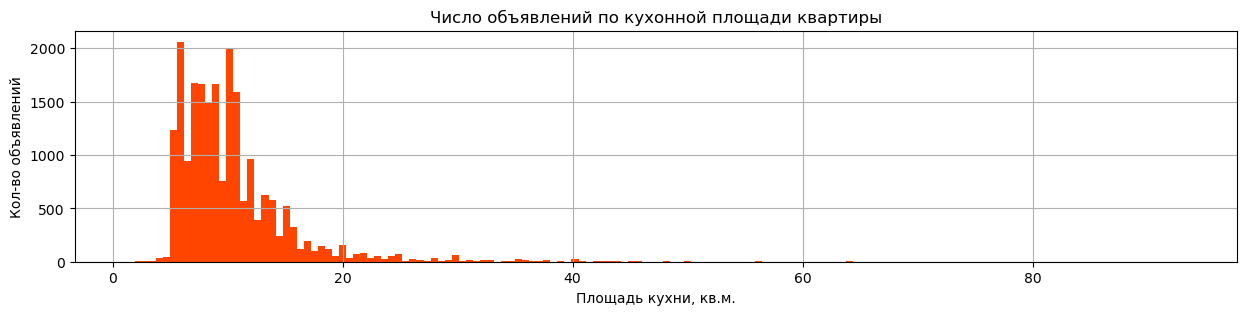

In [30]:
data['kitchen_area'].hist(bins = 150, figsize = (15,3), color = 'orangered')
plt.title("Число объявлений по кухонной площади квартиры")
plt.xlabel("Площадь кухни, кв.м.")
plt.ylabel("Кол-во объявлений");

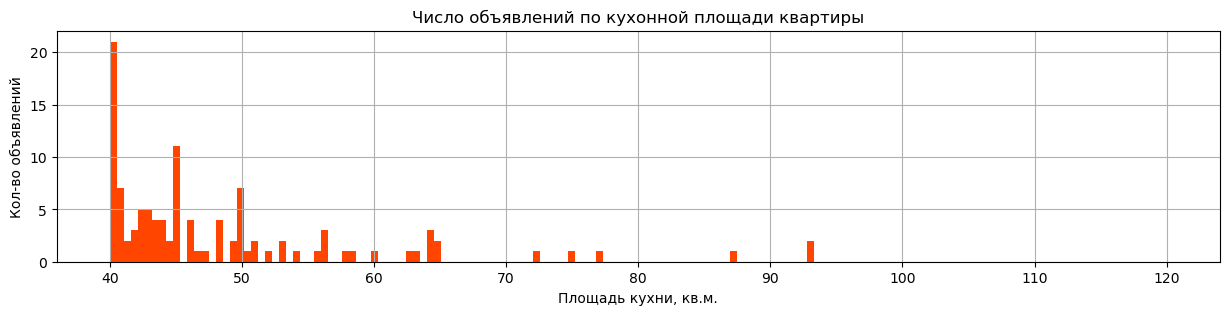

In [31]:
data['kitchen_area'].hist(bins = 150, figsize = (15,3), range=(40,120), color = 'orangered')
plt.title("Число объявлений по кухонной площади квартиры")
plt.xlabel("Площадь кухни, кв.м.")
plt.ylabel("Кол-во объявлений");

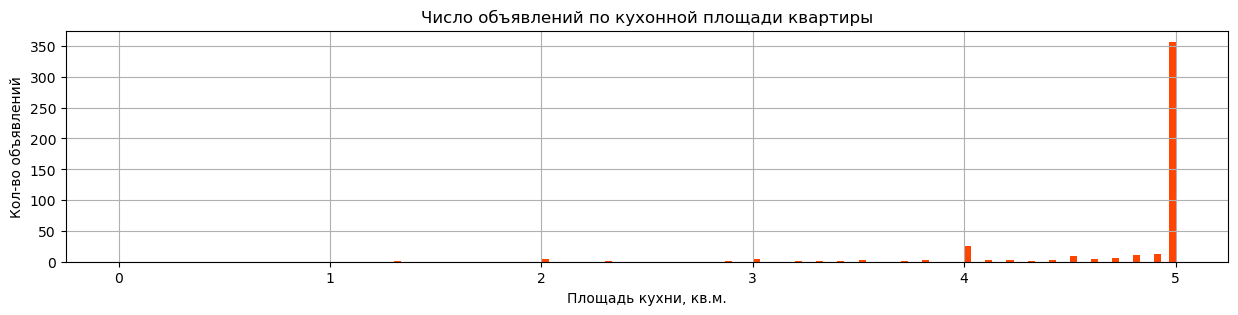

In [32]:
data['kitchen_area'].hist(bins = 150, figsize = (15,3), range=(0,5), color = 'orangered')
plt.title("Число объявлений по кухонной площади квартиры")
plt.xlabel("Площадь кухни, кв.м.")
plt.ylabel("Кол-во объявлений");

In [33]:
#поставим заглушки для пустых значений и удалим все аномальные значения

data['kitchen_area'] = data['kitchen_area'].fillna(39.9999)
data = data.loc[data['kitchen_area']>3.8]
data = data.loc[data['kitchen_area']<60]

**`last_price`**

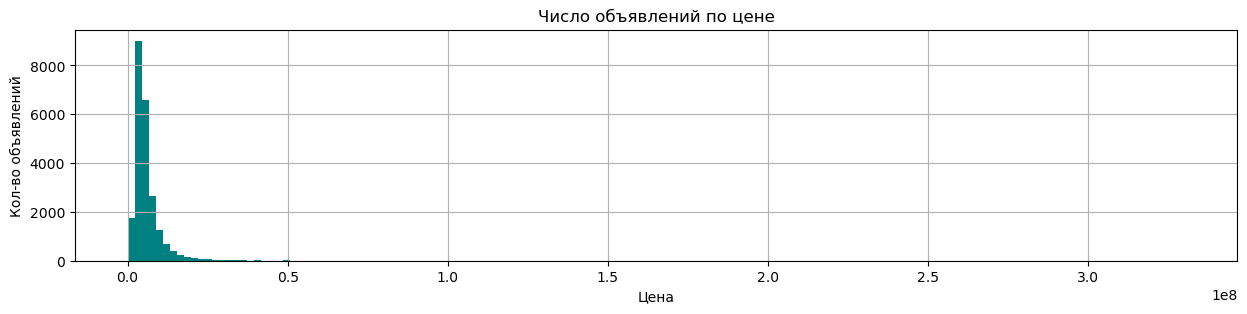

In [34]:
data['last_price'].hist(bins = 150, figsize = (15,3), color = 'teal')
plt.title("Число объявлений по цене")
plt.xlabel("Цена")
plt.ylabel("Кол-во объявлений");

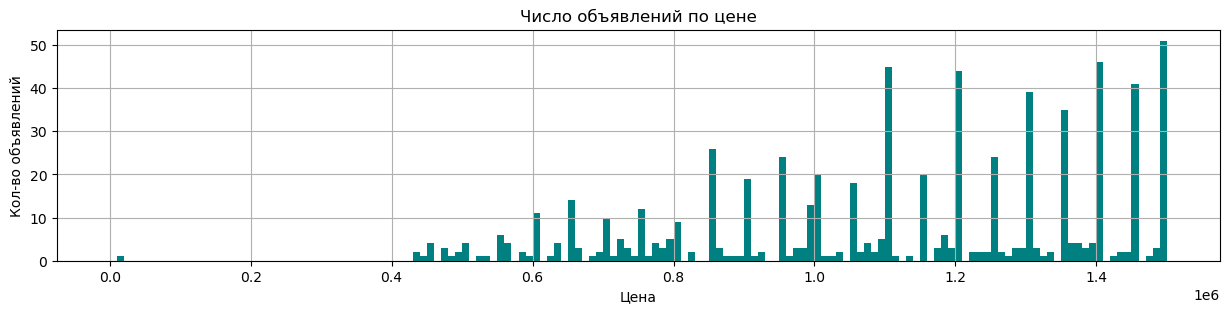

In [35]:
data['last_price'].hist(bins = 150, figsize = (15,3), range = (0, 1500000), color = 'teal')
plt.title("Число объявлений по цене")
plt.xlabel("Цена")
plt.ylabel("Кол-во объявлений");

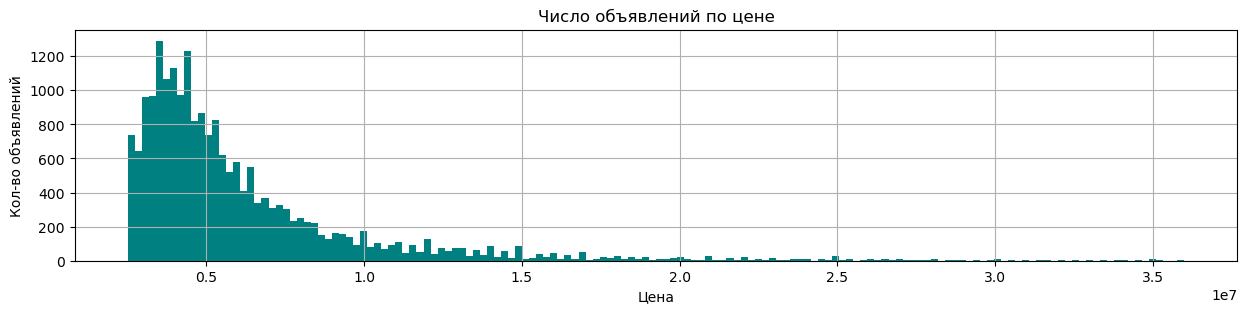

In [36]:
data['last_price'].hist(bins = 150, figsize = (15,3), range = (2500000, 36000000), color = 'teal')
plt.title("Число объявлений по цене")
plt.xlabel("Цена")
plt.ylabel("Кол-во объявлений");

Наибольшее число квартир продавалось по цене около 3- 4 млн руб. Далее квартир за большую цену становится все меньше и меньше. Установим диапазон для анализа - с 1 000 000 руб до 36 000 000 руб. Крайние значения (выбросы в меньшую и большую стороны) удалим.

In [37]:
data = data.loc[data['last_price']>1000000]
data = data.loc[data['last_price']<36000000]

В колонках **`floors_total`** и **`floors`** удалим слишком высокие этажи, чтобы они не искажали наш анализ. Будем ориентироваться на 99.9 квартиль.

In [38]:
data = data.loc[data['floors_total']<=35]
data = data.loc[data['floor']<=26]

**`days_exposition`**. Есть объявления, которые выставлялись всего 1-3 дня или более 1000 дней. Возможно, они были выставлены по ошибке и сразу удалены или на них выставлена слишком большая (нереальная) цена. Такие объявления не стоит учитывать при дальнейшем анализе. 

In [39]:
data = data.query('days_exposition.isna() | days_exposition >= 4')
data = data.query('days_exposition.isna() | days_exposition <= 1067.14')

In [40]:
# расчет количества удаленных данных
data_first = pd.read_csv('real_estate_data.csv', sep='\t')

print('Потерь записей:', ("{:.2%}".format(1-data.shape[0]/data_first.shape[0])))

Потерь записей: 4.99%


**Выводы:** Проанализировав квартили значений по столбцам, были найдены и обработаны следующие значения:

- `total_area` - строки со значениями менее 20 и более 197,45 кв.м. удалены;
- `rooms` - в квартирах студиях и в квартирах со свободной планровкой все значения установлены нулевыми, оставлены квартиры с не более, чем 8 комнатами;
- `ceiling_height` - аномальные значения более 10 м поделены на 10, а значения менее 2.3 и более 3.82 м заменены на медианное значение;
- `living_area` - площади менее 9.29 и более 122 кв.м. заменены на расчетные.
- `days_exposition` - слишком короткие и слишком длинные экспозиции были удалены.
- `last_price` - оставлены объявления с ценой от 1 млн. до 36 млн. руб.
- `kitchen_area` - отсеяны аномальные площади менее 3.8 кв.м. и более 60 кв.м.
- `floor` - удалены объявляения выше 26 этажа.
- `floors_total` - удалены объявления с домами выше 35 этажей.

Было удалено около 5% записей, значение оптимально, можно проводить анализ, не боясь искажений в данных.

### Добавление в таблицу новых столбцов

In [41]:
data['price_per_meter'] = data['last_price']/data['total_area'] # цена одного квадратного метра
data['week_day_exposition'] = data['first_day_exposition'].dt.weekday # день публикации объявления: 0- понедельник, 1 - вторник
data['month_exposition'] = data['first_day_exposition'].dt.month # месяц публикации объявления
data['year_exposition'] = data['first_day_exposition'].dt.year # год публикации объявления

def floor(row): # тип этажа квартир
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    if row['floor'] <= 0:
        return 'аномальный этаж'
    else:
        return 'другой'
data['categorize_floor'] = data.apply(floor, axis=1)

data['city_center_distance_km'] = round(data['cityCenters_nearest']/1000) # расстояние до центра города в км

data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,days_exposition,price_per_meter,week_day_exposition,month_exposition,year_exposition,categorize_floor,city_center_distance_km
0,20,13000000.00,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.00,16028.00,1,482.00,2,NaN,120370.37,3,3,2019,другой,16.00
1,7,3350000.00,40.40,2018-12-04,1,NaN,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.00,18603.00,0,NaN,0,81.00,82920.79,1,12,2018,первый,19.00
2,10,5196000.00,56.00,2015-08-20,2,NaN,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.00,13933.00,1,90.00,2,558.00,92785.71,3,8,2015,другой,14.00
4,2,10000000.00,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.00,8098.00,2,112.00,1,121.00,100000.00,1,6,2018,другой,8.00
5,10,2890000.00,30.40,2018-09-10,1,NaN,12,14.40,5,False,False,False,9.10,0,поселок городского типа Янино-1,NaN,NaN,0,NaN,0,55.00,95065.79,0,9,2018,другой,NaN
6,6,3700000.00,37.30,2017-11-02,1,NaN,26,10.60,6,False,False,False,14.40,1,поселок Парголово,52996.00,19143.00,0,NaN,0,155.00,99195.71,3,11,2017,другой,19.00
7,5,7915000.00,71.60,2019-04-18,2,NaN,24,40.68,22,False,False,False,18.90,2,Санкт-Петербург,23982.00,11634.00,0,NaN,0,NaN,110544.69,3,4,2019,другой,12.00
8,20,2900000.00,33.16,2018-05-23,1,NaN,27,15.43,26,False,False,False,8.81,0,Мурино,NaN,NaN,0,NaN,0,189.00,87454.76,2,5,2018,другой,NaN
9,18,5400000.00,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.00,15008.00,0,NaN,0,289.00,88524.59,6,2,2017,другой,15.00
10,5,5050000.00,39.60,2017-11-16,1,2.67,12,20.30,3,False,False,False,8.50,0,Санкт-Петербург,38357.00,13878.00,1,310.00,2,137.00,127525.25,3,11,2017,другой,14.00


**Выводы:** Для дальнейшего анализа данных были добавлены следующие столбцы: 

- цена одного квадратного метра - рассчитан как деление цены на общую площадь квартиры;

- день, месяц и год публикации объявления - вычислен из даты первой публикации объявления;

- тип этажа квартир - созданы три типа этажа квартир: первый, последний, другой;

- расстояние до центра города в км - переведены метры в километры.

## Исследовательский анализ данных

### Анализ гистограмм для каждого параметра

Построим гистограмму и количественные показатели для **`total_area`** - общей площади.

count   22516.00
mean       57.73
std        25.37
min        20.10
25%        40.00
50%        51.80
75%        68.30
max       197.20
Name: total_area, dtype: float64

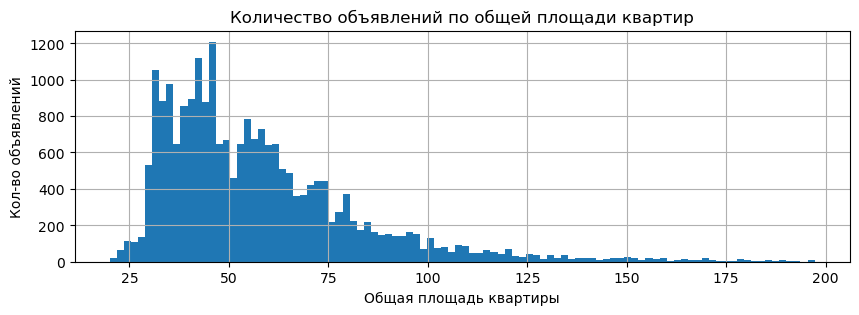

In [42]:
data['total_area'].hist(figsize=(10,3),bins = 100);
plt.title("Количество объявлений по общей площади квартир")
plt.xlabel("Общая площадь квартиры")
plt.ylabel("Кол-во объявлений")
data['total_area'].describe()

По гистограмме и таблице количественных значений видно, что наиболее часто встречатся квартиры от 40 до 70 кв.м. Медиана равна ~52 кв.м. Площадь самой большой квартиры составляет 197.2 кв.м. Рассмотрим диаграмму в большем масштабе в районе пика.

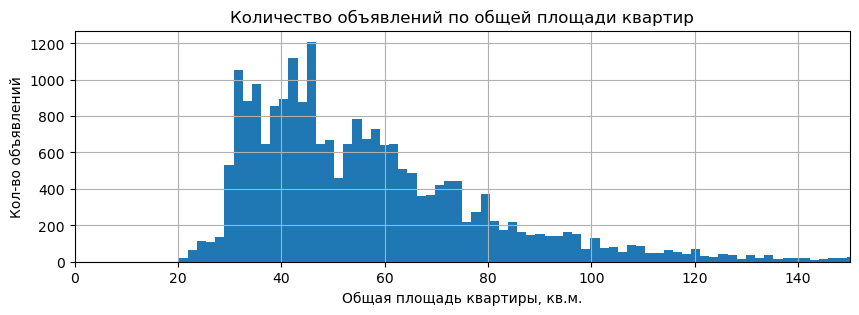

In [43]:
data['total_area'].hist(figsize=(10,3),bins = 100);
plt.xlim(0,150)
plt.title("Количество объявлений по общей площади квартир")
plt.xlabel("Общая площадь квартиры, кв.м.")
plt.ylabel("Кол-во объявлений");

Более, чем в 4,5 тыс. объявлений продаются квартиры общей площадью от 38 до 42 кв.м. А квартир площадью более 100 кв.м. в продаже очень мало.

Построим гистограмму и количественные показатели для **`living_area`** - жилой площади квартиры.

count   22516.00
mean       33.04
std        16.54
min         9.80
25%        19.00
50%        30.00
75%        42.00
max       122.00
Name: living_area, dtype: float64

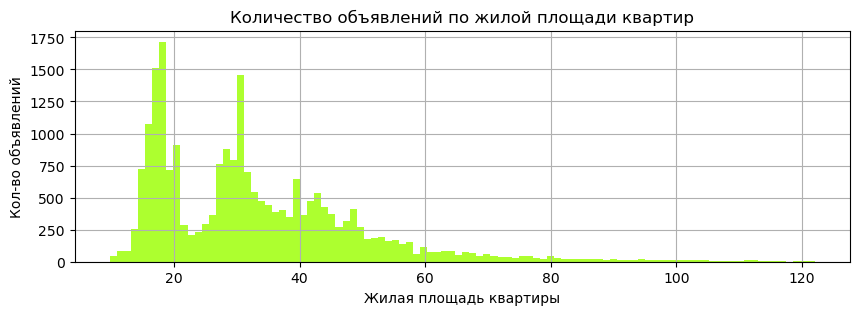

In [44]:
data['living_area'].hist(figsize=(10,3),bins = 100, color = 'greenyellow')
plt.title("Количество объявлений по жилой площади квартир")
plt.xlabel("Жилая площадь квартиры")
plt.ylabel("Кол-во объявлений")
data['living_area'].describe()

Интересный получился график. Наблюдается два пика графика.  Виден четко провал в районе 20-25 кв.м. Надо рассмотреть эту часть графика поближе на следующем шаге.

Text(0, 0.5, 'Кол-во объявлений')

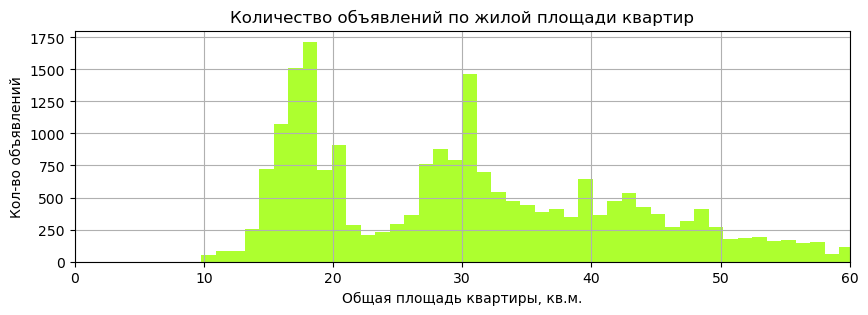

In [45]:
data['living_area'].hist(figsize=(10,3),bins = 100, color = 'greenyellow');
plt.xlim(0,60)
plt.title("Количество объявлений по жилой площади квартир")
plt.xlabel("Общая площадь квартиры, кв.м.")
plt.ylabel("Кол-во объявлений")

Квартиры площадью менее 9 кв.м. мы убрали из выборки на этапе предобработки данных. Более 4 тыс. объявлений о продаже квартир с жилой площадью около 17-21 кв.м. Это похоже на жилую площадь однокомнатных квартир. Далее провал в районе 21-25 кв.м. и в районе 25-32 кв.м. опять увеличеление числа объявлений. Провал, возможно, связан с тем, что существует немного одно- или двух- комнатных квартир с жилой площадью 21-25 кв.м. Если однокомнатная квартира, то чаще всего площадь будет до 21 кв.м., а двухкомнатные квартиры начинаются чаще всего от 25 кв.м. Медианное значение равно 30 кв.м. 

Построим гистограмму и количественные показатели для **`kitchen_area`** - кухонной площади квартиры.

count   22516.00
mean       13.04
std         9.82
min         4.00
25%         7.30
50%        10.00
75%        13.00
max        58.00
Name: kitchen_area, dtype: float64

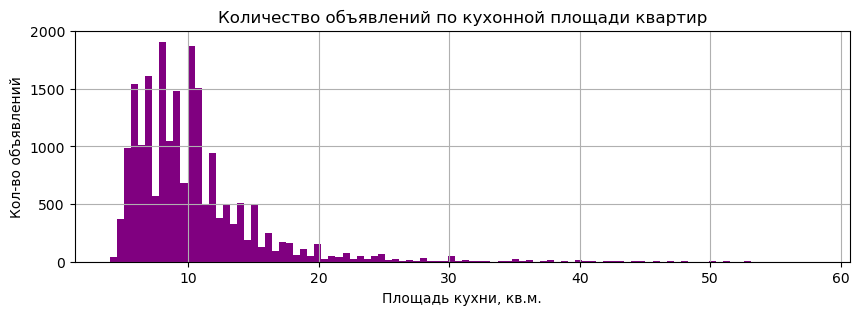

In [46]:
#из графика уберем "заглушки"
data.query('kitchen_area != 39.9999')['kitchen_area'].hist(figsize=(10,3),bins = 100, color = 'purple')
plt.title("Количество объявлений по кухонной площади квартир")
plt.xlabel("Площадь кухни, кв.м.")
plt.ylabel("Кол-во объявлений")
data['kitchen_area'].describe()

По графику видно, что чаще всего встречаются объявления с кухнями площадью от 8 до 13 кв.м.

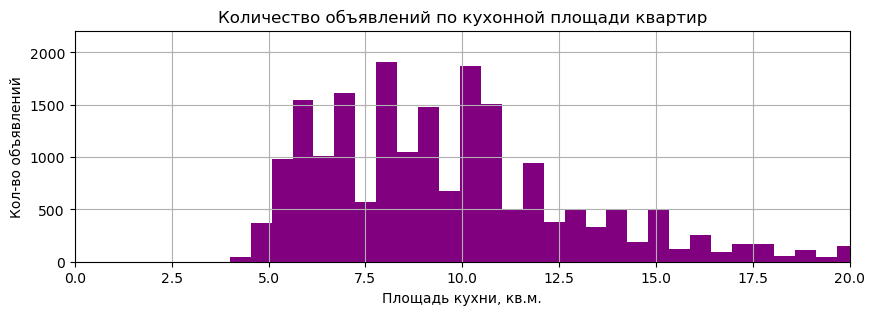

In [47]:
data['kitchen_area'].hist(figsize=(10,3),bins = 100,  color = 'purple')
plt.title("Количество объявлений по кухонной площади квартир")
plt.xlim(0,20)
plt.xlabel("Площадь кухни, кв.м.")
plt.ylabel("Кол-во объявлений");

Итак, при ближайшем рассмотрении видно, что чаще всего размер кухни составляет от 8 до 13 кв.м., что и подтверждает медианное значение - 10 кв.м. Кухни менее 5 кв.м. или более 15 кв.м. - единичные случаи. Чем больше площадь кухни, тем меньше попадается количество таких квартир.

Построим гистограмму и количественные показатели для **`last_price`** - цены за квартиру.

count      22516.00
mean     5766997.37
std      4053633.68
min      1010000.00
25%      3450000.00
50%      4600000.00
75%      6650000.00
max     35900000.00
Name: last_price, dtype: float64

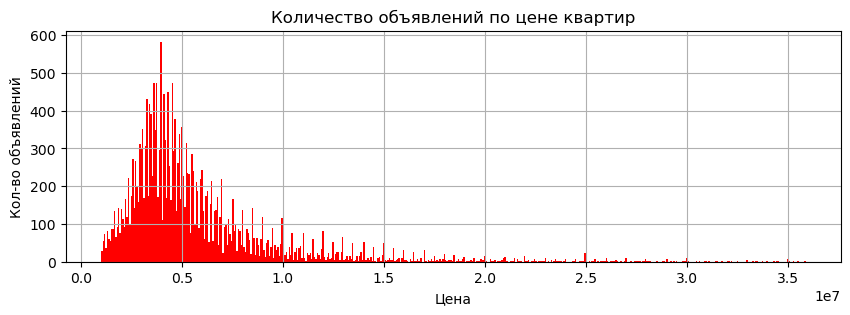

In [48]:
data['last_price'].hist(figsize=(10,3), bins = 500, color = 'red')
plt.title("Количество объявлений по цене квартир")
plt.xlabel("Цена")
plt.ylabel("Кол-во объявлений")
data['last_price'].describe()

На гистограмме четко виден пик и плохо виден "хвост", который уходит вправо. В продажах есть небольшое число квартир, превышающие сумму в 15 млн руб. Посмотрим пик в приближении. 

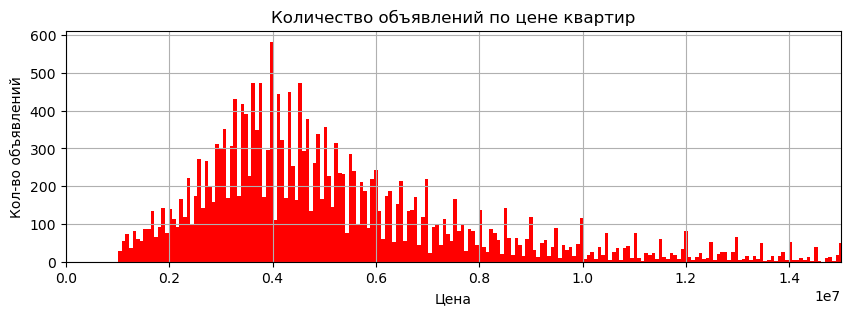

In [49]:
data['last_price'].hist(figsize=(10,3),bins = 500, color = 'red');
plt.xlim(0,15000000)
plt.title("Количество объявлений по цене квартир")
plt.xlabel("Цена")
plt.ylabel("Кол-во объявлений");

Наибольшее число квартир продавалось по цене около 3- 6 млн руб. Медианное значение составляем 4.6 млн. Далее квартир за большую цену становится все меньше и меньше. 

Построим следующую гистограмму и количественные показатели для **`rooms`** - количество комнат.

count   22516.00
mean        2.03
std         0.99
min         0.00
25%         1.00
50%         2.00
75%         3.00
max         8.00
Name: rooms, dtype: float64

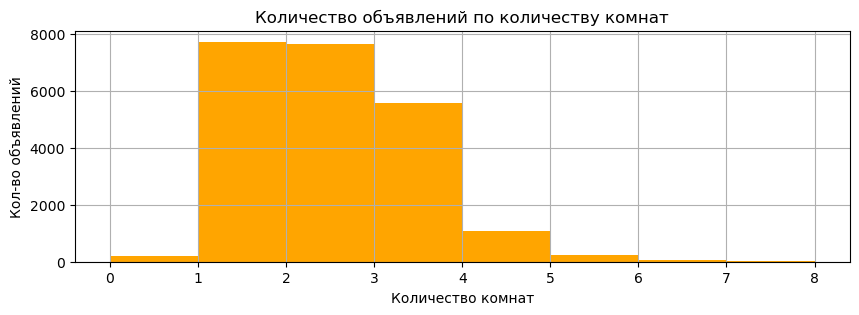

In [50]:
data['rooms'].hist(figsize=(10,3),bins = 8, color = 'orange')
plt.title("Количество объявлений по количеству комнат")
plt.xlabel("Количество комнат")
plt.ylabel("Кол-во объявлений")
data['rooms'].describe()

При построении графика, ось икс является количеством комнат. Наиболее часто на продажу выставляются  1-2-3 комнатные квартиры. Квартир-студий и квартир со свободной планировкой (квартиры, где 0 комнат) продается меньше, чем пятикомнатных, но больше, чем шестикомнатных. Самый частый предмет продажи в объявлениях - однокомнатные квартиры - около 8 тыс объявлений. Число двухкомнатных квартир ненамного меньше. Трехкомнатных квартир - не более 6 тыс., а четырехкомнатных - около 1 тыс. Далее, чем больше комнат, тем реже они встречаются в продаже.

Построим следующую гистограмму и количественные показатели для **`ceiling_height`** - высота потолков.

count   13871.00
mean        2.71
std         0.23
min         2.30
25%         2.51
50%         2.65
75%         2.80
max         3.80
Name: ceiling_height, dtype: float64

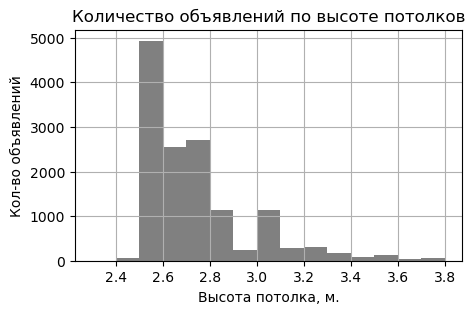

In [51]:
data['ceiling_height'].hist(figsize=(5,3), bins = 15, color = 'grey')
plt.title("Количество объявлений по высоте потолков")
plt.xlabel("Высота потолка, м.")
plt.ylabel("Кол-во объявлений")
data['ceiling_height'].describe()

Наиболее популярная высота потолков 2.5-2.7 м, это и понятно, потому что стандартная высота потолков в жилых домах такой и является. На графике есть провал в районе 2.9 м. В основном такие потолки имеются в квартирах сталинской постройки. Возможно, при подаче объявления, люди округляли высоту, указав 3.0, мало, кто их действительно мерял и смотрел в документацию, чтоб уточнить 2.9 или 3.0 м. Потолков выше 3.5 очень мало в датасете.

Построим следующую гистограмму и количественные показатели для **`floor`** - этаж расположения квартиры.

count   22516.00
mean        5.91
std         4.86
min         1.00
25%         2.00
50%         4.00
75%         8.00
max        26.00
Name: floor, dtype: float64

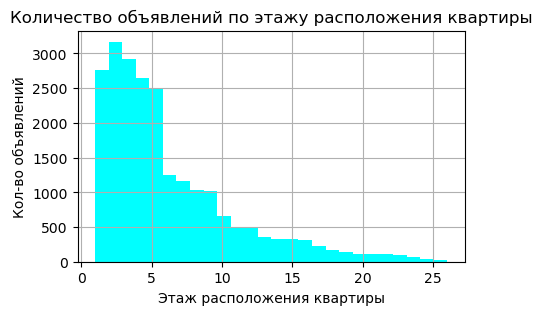

In [52]:
data['floor'].hist(figsize=(5,3),bins = 26, color = 'aqua')
plt.title("Количество объявлений по этажу расположения квартиры")
plt.xlabel("Этаж расположения квартиры")
plt.ylabel("Кол-во объявлений")
data['floor'].describe()

На гистограмме четко виден нисходящий график, а это значит, чем выше этаж, тем меньше квартир продается. Исключение составляют только квартиры, расположенные на втором этаже, их больше, чем квартир на первом этаже. Самые популярные объявления о продаже квартир на 1-5 этажах. Возможно, это связано с тем, что чаще всего продают квартиры, расположенные в пятиэтажных домах. 

Построим график и таблицу количественных показателей для **`categorize_floor`** - типа этажа.

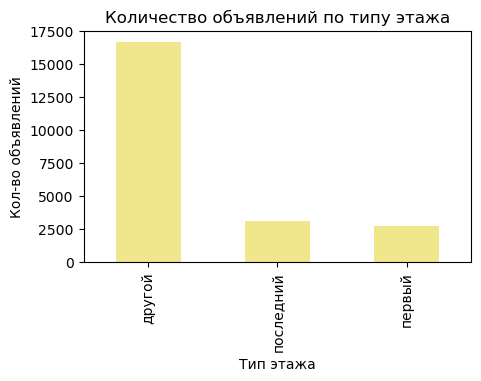

In [53]:
data['categorize_floor'].value_counts().plot(kind='bar', figsize = (5,3), color = 'khaki')
plt.title("Количество объявлений по типу этажа")
plt.xlabel("Тип этажа")
plt.ylabel("Кол-во объявлений");

На графике отчетливо видно, что больше всего продается квартир на других этажах, а количество квартир на первом и последнем этаже почти одинаково. Первый и последний этаж ограничены одним этажом, а в категорию "другой" входят все этажи со второго по предпоследний, поэтому это группа оказалась самой многочисленной.

Построим гистограмму и количественные показатели для **`cityCenters_nearest`** - расстояние до центра города.

count   17337.00
mean    14366.44
std      8572.09
min       181.00
25%      9602.00
50%     13221.00
75%     16344.00
max     65952.00
Name: cityCenters_nearest, dtype: float64

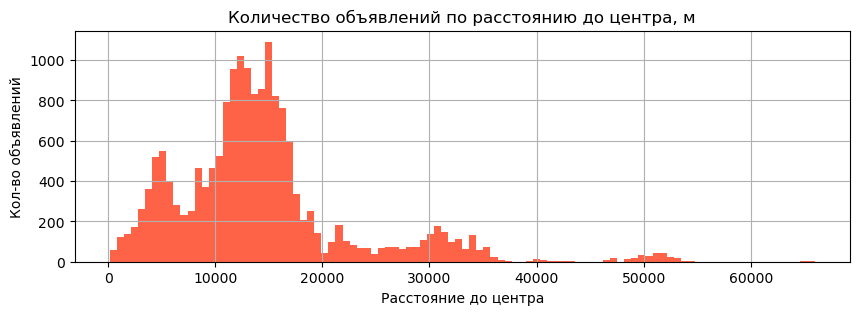

In [54]:
data['cityCenters_nearest'].hist(figsize=(10,3),bins = 100, color = 'tomato')
plt.title("Количество объявлений по расстоянию до центра, м")
plt.xlabel("Расстояние до центра")
plt.ylabel("Кол-во объявлений")
data['cityCenters_nearest'].describe()

По графику видно, что есть квартиры расположенные в непосредственной близости от центра (минимальное рассстояние исходя из таблицы - 181м), а есть те, которые находятся очень далеко, почти 66 км. Возможно, это населенные пункты, которые находятся вдалеке от городов. Много квартир расположены в 9-16 км (согласно 1 и 3 квартили) от центра города. Но имеется много пик на графике, что говорит о том, что распоржение объектов, собранных в датасете, разнообразное.

Построим гистограмму и количественные показатели для **`parks_nearest`** - расстояние до парка.

count   7617.00
mean     492.74
std      339.49
min        1.00
25%      290.00
50%      456.00
75%      613.00
max     3190.00
Name: parks_nearest, dtype: float64

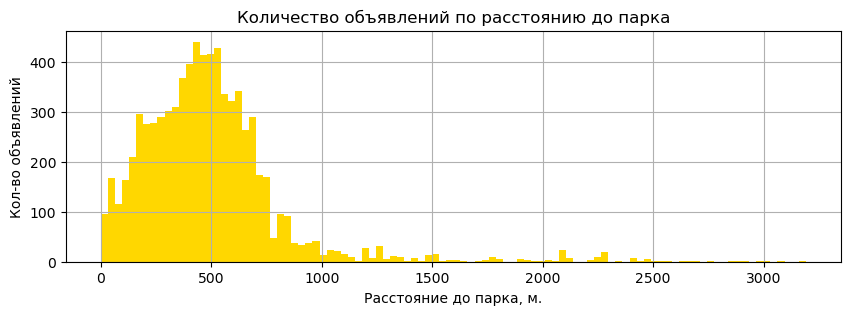

In [55]:
data['parks_nearest'].hist(figsize=(10,3), bins = 100, color = 'gold')
plt.title("Количество объявлений по расстоянию до парка")
plt.xlabel("Расстояние до парка, м.")
plt.ylabel("Кол-во объявлений")
data['parks_nearest'].describe()

Минимально указанное расстояние до парка составляет 1 метр, а максимальное 3 км. Большинство квартир расположены в 290-613 м от парка. Квартир, расположенных далее 1 км заметно меньше. Стоит отметить, что здесь указаны только те квартиры, в объявлении которых было указано рассстояние. Но есть и пустые значения по данному параметру в датасете, которые в этот график не вошли.

Построим гистограмму и количественные показатели для **`week_day_exposition`** - день недели, когда выставлено объявление.

count   22516.00
mean        2.56
std         1.79
min         0.00
25%         1.00
50%         3.00
75%         4.00
max         6.00
Name: week_day_exposition, dtype: float64

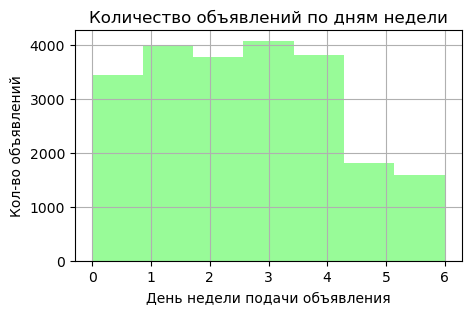

In [56]:
data['week_day_exposition'].hist(figsize=(5,3), bins = 7, color = 'palegreen')
plt.title("Количество объявлений по дням недели")
plt.xlabel("День недели подачи объявления")
plt.ylabel("Кол-во объявлений")
data['week_day_exposition'].describe()

На оси икс расположены дни недели, 0 - понедельник, 6 - воскресение. Очень хорошо видно, что объявления выкладывают в будние дни, больше всего в четверг. В выходные объявлений заметно меньше, меньше всего в воскресение. Возможно, это связано с тем, что в основном объявления выкладывают риэлторы, а они, как и многие люди, работают 5/2. 

Построим гистограмму и количественные показатели для **`month_exposition`** - месяц недели, когда выставлено объявление.

count   22516.00
mean        6.40
std         3.49
min         1.00
25%         3.00
50%         6.00
75%        10.00
max        12.00
Name: month_exposition, dtype: float64

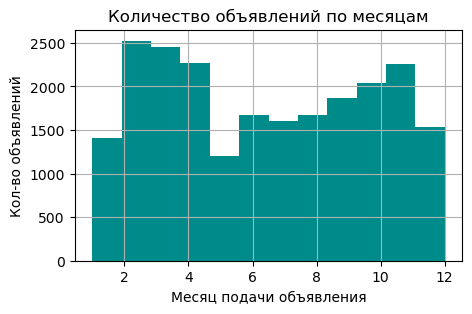

In [57]:
data['month_exposition'].hist(figsize=(5,3),bins = 12, color = 'darkcyan')
plt.title("Количество объявлений по месяцам")
plt.xlabel("Месяц подачи объявления")
plt.ylabel("Кол-во объявлений")
data['month_exposition'].describe()

Интересный график зависимости количества объявлений от месяца опубликования. Больше всего объявлений выложено в феврале, марте и апреле. Меньше всего в мае, январе и декабре. Это говорит о сезонности продаж жилой недвижимости. В районе Нового года и майских праздников людям не до продаж недвижимости. А вот после Нового года многие хотят изменений или завершить незаконченные дела и поэтому продажи возрастают.

Построим гистограмму и количественные показатели для **`airports_nearest`**.

count   17317.00
mean    28847.82
std     12724.50
min         0.00
25%     18446.00
50%     26895.00
75%     37407.00
max     84853.00
Name: airports_nearest, dtype: float64

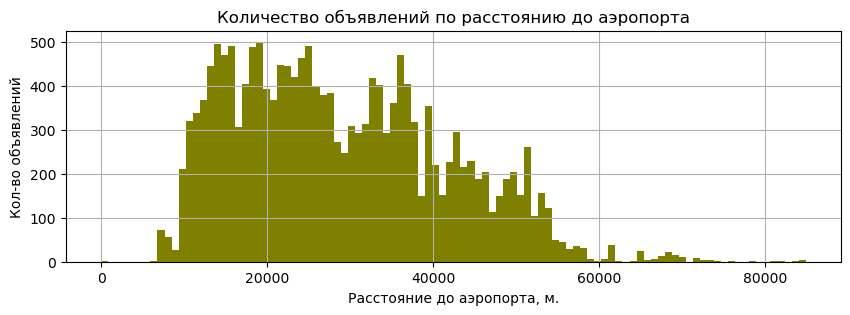

In [58]:
data['airports_nearest'].hist(figsize=(10,3),bins = 100, color = 'olive')
plt.title("Количество объявлений по расстоянию до аэропорта")
plt.xlabel("Расстояние до аэропорта, м.")
plt.ylabel("Кол-во объявлений")
data['airports_nearest'].describe()

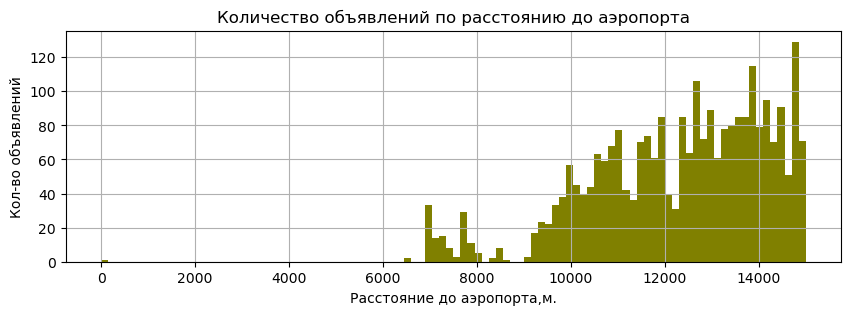

In [59]:
data['airports_nearest'].hist(figsize=(10,3),bins = 100, range = (0,15000), color = 'olive')
plt.title("Количество объявлений по расстоянию до аэропорта")
plt.xlabel("Расстояние до аэропорта,м.")
plt.ylabel("Кол-во объявлений");

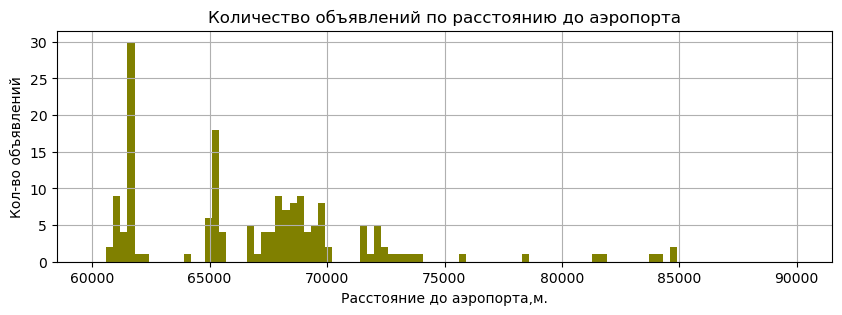

In [60]:
data['airports_nearest'].hist(figsize=(10,3),bins = 100, range = (60000,90000), color = 'olive')
plt.title("Количество объявлений по расстоянию до аэропорта")
plt.xlabel("Расстояние до аэропорта,м.")
plt.ylabel("Кол-во объявлений");

В целом, расстояние до аэропорта на графике сначала резко возрастает, а далее идет на уменьшение, чем дальше от аэропорта, тем в меньшем количестве объявлений указывают этот параметр. Это скорее актуально для Санкт-Петербурга и наиближайших к нему населенных пунктах, в объявлениях на окраине Ленинградской области вряд ли будут указывать расстояние до аэропорта. Наибольшее количество объявлений зафиксировано от 18 до 37 км. Свыше 80 км и ближе 6 км - единичные случаи.

Построим гистограмму и количественные показатели для **`floors_total`**.

count   22516.00
mean       10.78
std         6.57
min         1.00
25%         5.00
50%         9.00
75%        16.00
max        35.00
Name: floors_total, dtype: float64

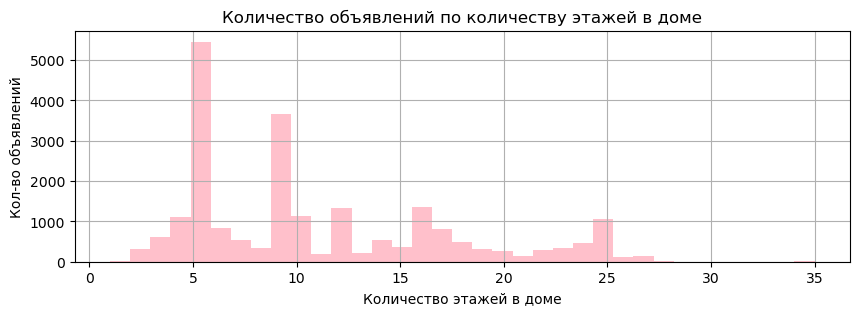

In [61]:
data['floors_total'].hist(figsize=(10,3),bins = 35, color = 'pink')
plt.title("Количество объявлений по количеству этажей в доме")
plt.xlabel("Количество этажей в доме")
plt.ylabel("Кол-во объявлений")
data['floors_total'].describe()

График показал очевидные вещи, больше всего квартир продается в пяти- и девятиэтажных домах. Реже встречаются 4-, 12-, 16-, 24-этажные дома.

**Вывод**. Были проанализированы и построены графики по каждому столбцу.  
На основе анализы были сделаны следующие выводы:

- чаще всего продаются 1-2-3 комнатные квартиры на 2-5 этажах в 5-,9-этажных домах в Санкт-Петербурге;  
- цена чаще всего варьируется от 3 до 6 млн руб.
- количество продаж зависит от сезонности;
- объявления чаще всего выкладывают в будние дни.

### Анализ столбца days_exposition - как быстро продавали квартиры

Изучим, как быстро продавались квартиры (столбец **`days_exposition`**). Этот параметр показывает, сколько дней «висело» каждое объявление.

count   19490.00
mean      170.43
std       193.17
min         4.00
25%        45.00
50%        94.00
75%       223.00
max      1067.00
Name: days_exposition, dtype: float64

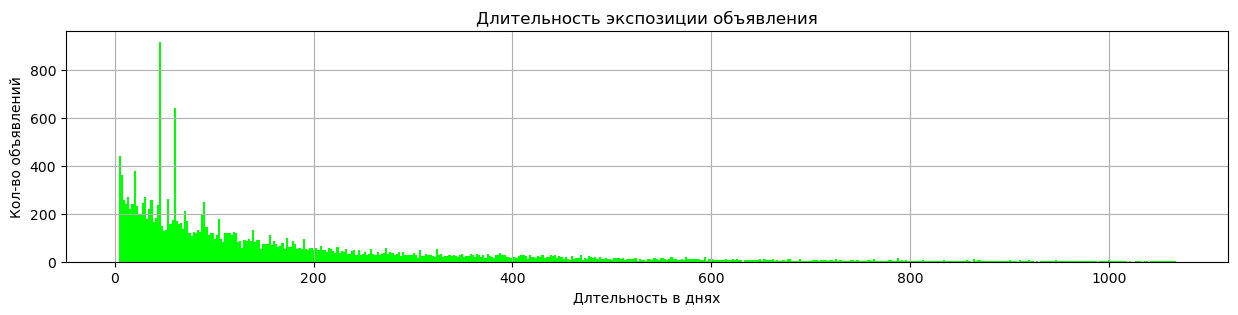

In [62]:
# построим гистограмму
data['days_exposition'].hist(figsize=(15,3),bins = 500, color = 'lime');
plt.title("Длительность экспозиции объявления")
plt.xlabel("Длтельность в днях")
plt.ylabel("Кол-во объявлений")
# посчитаем количественные характеристики
data['days_exposition'].describe()

Итак, из таблицы количественных значений видим, что минимальноее количество дней, которое висело объявление составляет - 3 дня. Максимальное количество дней - 1580 (это 3 года 285 дней). Медиана составляет 95 дней, это значит, что половина всех квартир продалась в первые 94 дня (или в первые 3 месяца). В целом график нисходящий, что говорит о том, что чем дольше висит объявление, тем шансов продать квартиру меньше. Возможно, цена высокая, или расположение неудачное, или еще какая-то характеристика мешает эту квартиру купить. Рассмотрим пики графика поближе.

(30.0, 100.0)

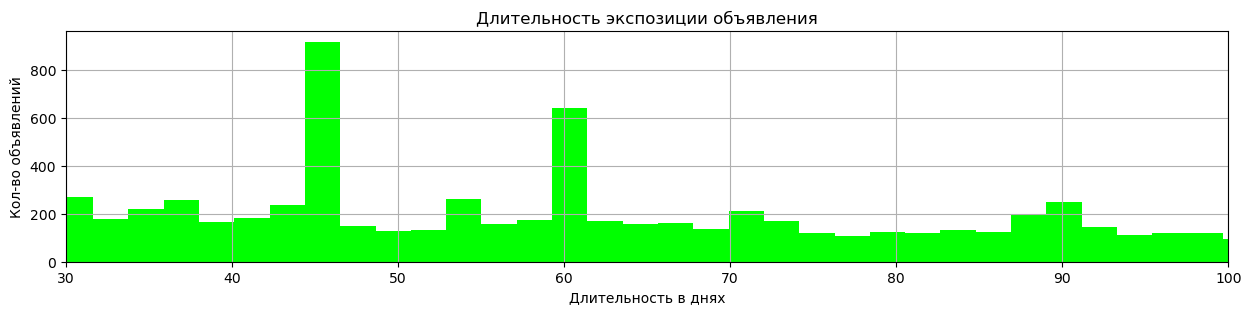

In [63]:
data['days_exposition'].hist(figsize=(15,3),bins = 500, color = 'lime');
plt.title("Длительность экспозиции объявления")
plt.xlabel("Длительность в днях")
plt.ylabel("Кол-во объявлений")
plt.xlim(30,100)

Отчетливо видны пики примерно на отметках около 45 и 60 дней. Значит, квартиры чаще всего выкупают после 1,5 и 2,0 месяцев экспозиции. Можно предположить, что всплески связаны со сроком размещения, которые ограничены 45,60 и 90 дней. Быстрыми продажи можно считать квартиры проданные за менее чем 45 дней (меньше отметки первого квантиля), а долгие продажи, это те, которые висят в объявляениях более 223 дней или 7,5 месяцев (больше третьего квартиля).

                 days_exposition
year_exposition                 
2014                      731.24
2015                      559.21
2016                      318.98
2017                      159.63
2018                       94.77
2019                       31.67


Text(0, 0.5, 'Кол-во объявлений')

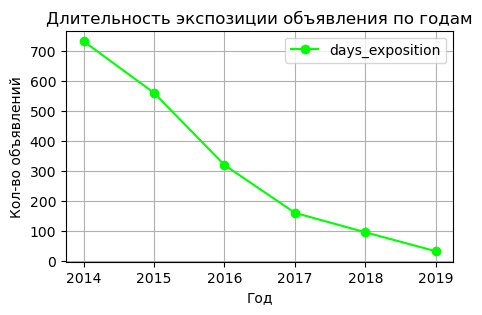

In [64]:
print(data.pivot_table(index = 'year_exposition', values = 'days_exposition', aggfunc = 'mean'))
data.pivot_table(index = 'year_exposition', values = 'days_exposition', aggfunc = 'mean')\
    .plot(grid = True, style = 'o-', color = 'lime', figsize = (5,3))
plt.title("Длительность экспозиции объявления по годам")
plt.xlabel("Год")
plt.ylabel("Кол-во объявлений")

Наблюдается снижение экспозиции квартир с каждым последующим годом. Возможно, это связано с тем, что увеличился спрос на квартиры и они стали продаваться быстрее или улучшался сервис Яндекс.недвижимость, стал удобнее, много информации о квартире, которую не надо дополнительно узнавать по телефону, тратя время.

### Влияние факторов на общую стоимость объекта недвижимости

Изучим, какие факторы больше всего влияют на общую (полную) стоимость объекта. Рассмотрим, как зависят цена квадратного метра от общей площади квартиры, от жилой площади и от площади кухни (**`last_price` - `total_area`**, **`last_price` - `living_area`**,**`last_price` - `kitchen_area`**).

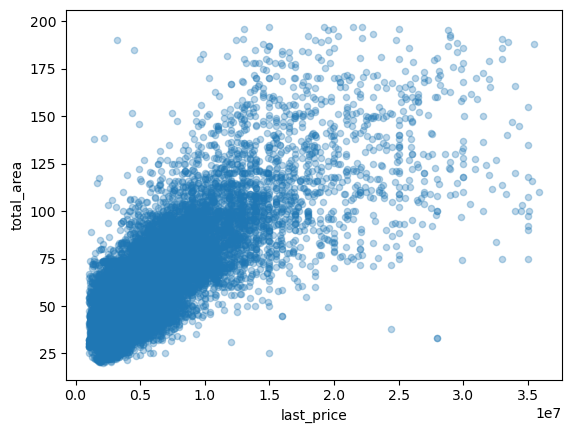

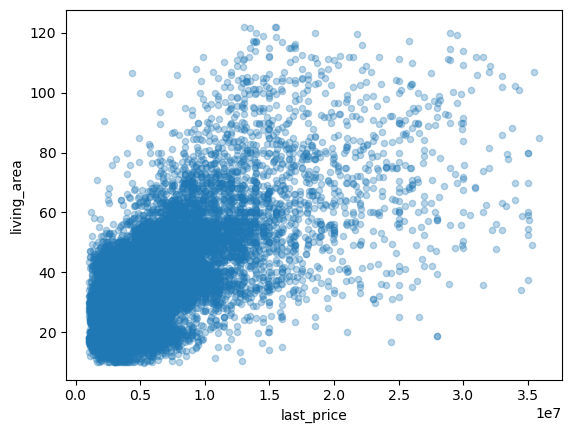

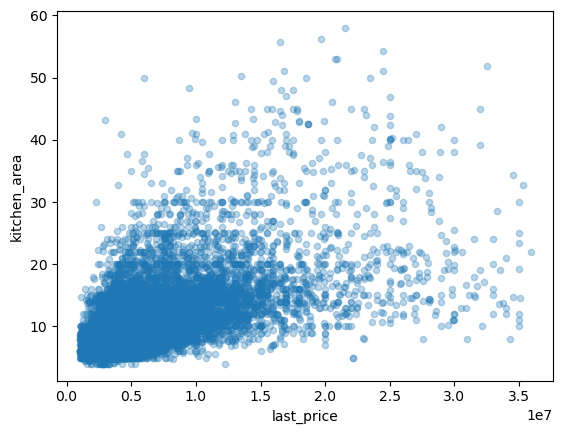

In [65]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha = 0.3);
data.plot(x='last_price', y='living_area', kind='scatter', alpha = 0.3);
data.query('kitchen_area != 39.9999').plot(x='last_price', y='kitchen_area', kind='scatter', alpha = 0.3);

Посмотрим в приближениии часть графика, где наибольшее скопление точек.

(0.0, 40.0)

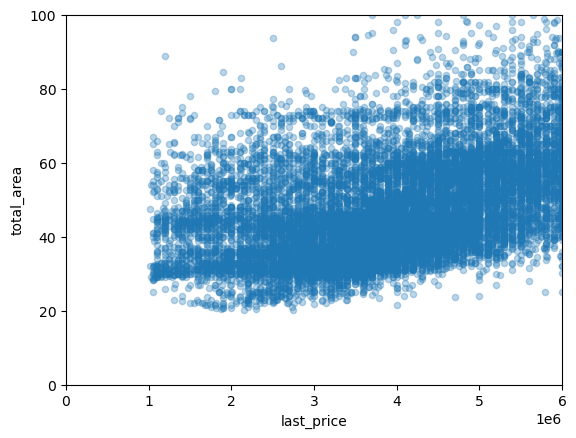

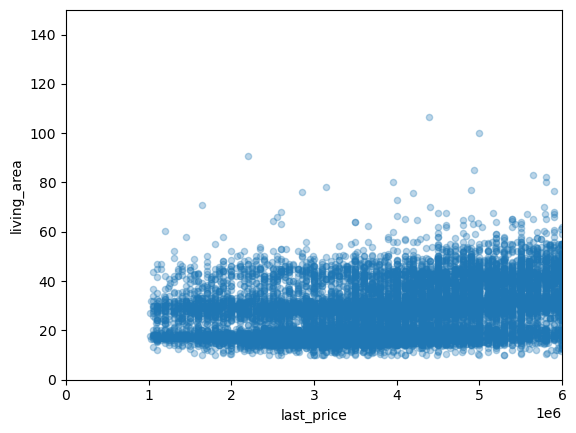

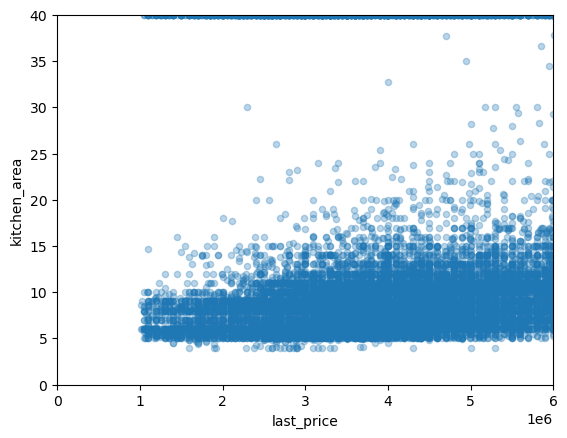

In [66]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha = 0.3);
plt.xlim(0,6000000)
plt.ylim(0,100)

data.plot(x='last_price', y='living_area', kind='scatter', alpha = 0.3);
plt.xlim(0,6000000)
plt.ylim(0,150)

data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha = 0.3);
plt.xlim(0,6000000)
plt.ylim(0,40)

Графики в целом похожи друг на друга, большое скопление значений в левом нижнем углу, Но дальше точки рассеиваются. 

Для того, чтобы понять насколько зависимы эти два значения друг от друга, посчитаем коэффициент корреляции каждой зависимости.

In [67]:
print('Коэффициент корреляции цена - общая площадь', round(data['last_price'].corr(data['total_area']),2))
print('Коэффициент корреляции цена - жилая площадь', round(data['last_price'].corr(data['living_area']),2))
print('Коэффициент корреляции цена - площадь кухни', round(data['last_price'].corr(data['kitchen_area']),2))

Коэффициент корреляции цена - общая площадь 0.78
Коэффициент корреляции цена - жилая площадь 0.68
Коэффициент корреляции цена - площадь кухни 0.24


По коэффициентам видно, что цена наиболее зависит от общей площади. Чем больше площадь, тем выше цена. От площади кухни почти не зависит, коэффициент корреляции всего 0.24

Рассмотрим, как зависит цена от количества комнат (**`last_price` - `rooms`**). Сгруппируем по количеству комнат рассчитаем медиану и построим на основе этого график.

rooms
0    2810000.00
1    3600000.00
2    4800000.00
3    6170000.00
4    8540000.00
5   12300000.00
6   13400500.00
7   16750000.00
8   19145000.00
Name: last_price, dtype: float64

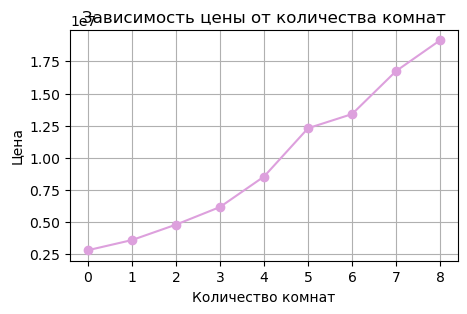

In [68]:
data.groupby('rooms')['last_price'].median().plot(style = 'o-', grid = True, color = 'plum', figsize = (5,3))
plt.title("Зависимость цены от количества комнат")
plt.xlabel("Количество комнат")
plt.ylabel("Цена")
data.groupby('rooms')['last_price'].median()

На данном графике видно, что цена увеличивается с количеством комнат.

Рассмотрим, как зависит цена от типа этажа на котором расположена квартира. Для этого создадим сводную таблицу, содержащую медианные значения цены квадратного метра в зависимости от типа этажа.

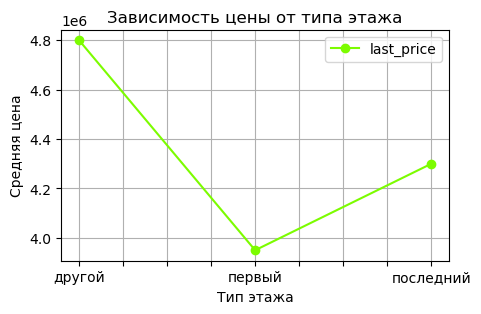

In [69]:
data.pivot_table(index='categorize_floor', values='last_price', aggfunc='median')\
 .plot(grid=True, style='o-', figsize=(5, 3), color = 'lawngreen')
plt.title("Зависимость цены от типа этажа")
plt.xlabel("Тип этажа")
plt.ylabel("Средняя цена");

 Как видно из графика, самые дешевые квартиры расположены на первых этажах. Квартиры, расположенные на последних этажах, чуть подороже. И самые дорогие квартиры расположены на средних этажах. 

Здесь можно посчитать на сколько процентов дешевле квартиры расположенные на первых и последних эатажах.

In [70]:
#сгруппируем по типу этажа и посчитаем медиану цены
grouped_data = data.groupby('categorize_floor')['last_price'].median()
grouped_data

categorize_floor
другой      4800000.00
первый      3950000.00
последний   4300000.00
Name: last_price, dtype: float64

In [71]:
#вычислим на сколько дешевле квартиры на первых и последних этажах
print('Скидка на первый этаж:', ("{:.0%}".format(1-(list(grouped_data)[1]/list(grouped_data)[0]))))
print('Скидка на последний этаж:', ("{:.0%}".format(1-(list(grouped_data)[2]/list(grouped_data)[0]))))

Скидка на первый этаж: 18%
Скидка на последний этаж: 10%


На основе нашего датасета мы вычислили среднюю скидку на первый и последний этажи. Они составляют 18% и 10% соответственно. 

Рассмотрим, как зависит цена от даты размещения (день недели, месяц, год). Для этого также вычислим медианное значение цены квадратного метра.

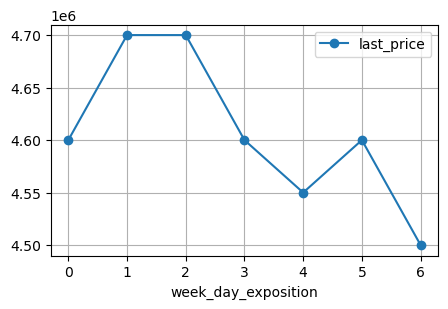

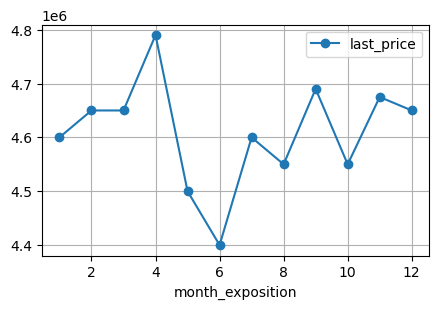

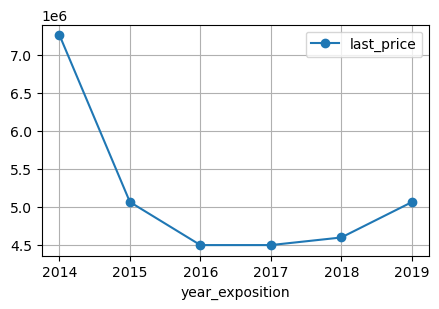

In [72]:
data.pivot_table(index='week_day_exposition', values='last_price', aggfunc='median')\
 .plot(grid=True, style='o-', figsize=(5, 3));
data.pivot_table(index='month_exposition', values='last_price', aggfunc='median')\
 .plot(grid=True, style='o-', figsize=(5, 3));
data.pivot_table(index='year_exposition', values='last_price', aggfunc='median')\
 .plot(grid=True, style='o-', figsize=(5, 3));

По графику видно, что самые дешевые квартиры выставлялись в субботу, а самые дорогие во вторник. Но разница в стоимости составляет всего 2000 руб. Рассматривая стоимость по месяцам, можно заметить, что меньше всего стоимость квадратного метра за квартиру - в мае и июне, самые большие стоимости - в апреле и августе. В 2014 года была самая дорогая недвижимость, потом стоимость резко упала и с 2016 года начала постепенно расти. 

In [73]:
days = data.pivot_table(index = 'year_exposition', values = 'days_exposition', aggfunc = 'sum')
price = data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = 'mean')
total = data.pivot_table(index = 'year_exposition', values = 'total_area', aggfunc = 'mean')
pivot = days.join([price, total])
print(pivot)

                 days_exposition  last_price  total_area
year_exposition                                         
2014                    54112.00  9330256.77       81.08
2015                   504408.00  6414806.62       64.12
2016                   823600.00  5778918.65       59.17
2017                  1216701.00  5663079.02       57.79
2018                   690379.00  5624991.52       56.42
2019                    32461.00  6130006.33       57.05


In [74]:
pivot.corr()

,days_exposition,last_price,total_area
days_exposition,1.00,-0.64,-0.52
last_price,-0.64,1.00,0.98
total_area,-0.52,0.98,1.00


Text(0, 0.5, 'Общая площадь')

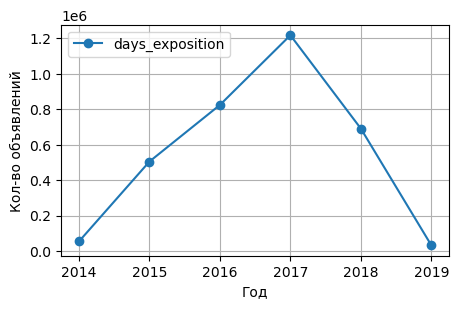

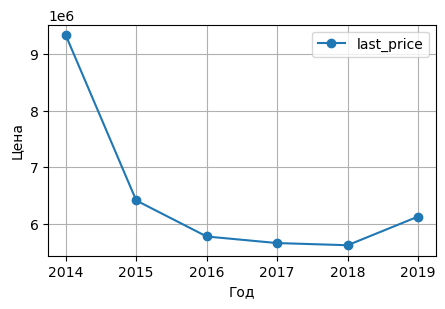

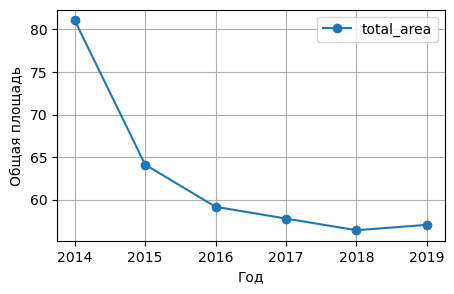

In [75]:
days.plot(grid=True, style='o-', figsize=(5, 3))
plt.xlabel("Год")
plt.ylabel("Кол-во объявлений")
price.plot(grid=True, style='o-', figsize=(5, 3))
plt.xlabel("Год")
plt.ylabel("Цена")
total.plot(grid=True, style='o-', figsize=(5, 3))
plt.xlabel("Год")
plt.ylabel("Общая площадь")

Количество объявлений росло до 2017 года, потом начало резко падать.Учитывая скоорость продаж, возможно, некоторые объявления за последний год еще висят, поэтому снятых объявлений не так много, как за  2017 года, например. Цена до 2018 года снижалась, возожно, связано с экономическим кризисом. В 2019 году цена стала увеличиваться. Наблюдается сильная зависимость между ценой и площадью, значит, чем больше площадь квартиры, тем больше ее цена. Коэффициент корреляции равен 0.99. У цены и количества дней экспозиции - -0,52, это значит, что чем выше цена, тем меньше срок экспозиции. То же самое с площадью и ценой.

### Вычисление средней цены одого квадратного метра в 10 населенных пунктах с наибольших числом объявлений

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

    Населенный пункт  Кол-во объявлений  Цена за кв.м.
0    Санкт-Петербург              14976      111042.58
1             Мурино                573       85958.43
2     поселок Шушары                434       78552.71
3         Всеволожск                394       68768.34
4             Пушкин                356      102961.70
5            Колпино                331       75351.43
6  поселок Парголово                317       90143.16
7            Гатчина                303       68926.26
8    деревня Кудрово                294       92362.79
9             Выборг                231       58738.32


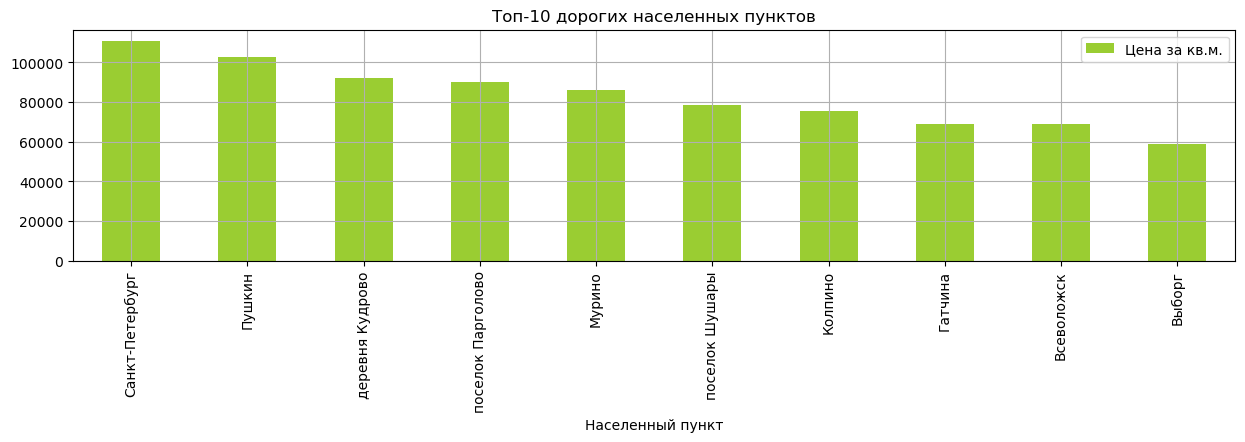

In [76]:
#сгруппируем по населенным пунктам, посчитаем количество и среднее значение квадратного метра
#расположим по убыванию количества
#выберем первые 10 населенных пунктов и выведем цену

top_10 = data.groupby('locality_name')\
             .agg({'price_per_meter': ['count', 'mean']})\
             .sort_values(by = [('price_per_meter', 'count')], ascending = False)\
             .head(10)\
             .reset_index()
top_10.columns = ['Населенный пункт', 'Кол-во объявлений', 'Цена за кв.м.']

print(top_10)

top_10.sort_values(by='Цена за кв.м.', ascending = False)\
      .plot(x ='Населенный пункт', y = 'Цена за кв.м.', figsize = (15,3), grid=True,  kind = 'bar', color = 'yellowgreen')
plt.title('Топ-10 дорогих населенных пунктов');

По таблице видим, что больше всего квартир продают в Санкт - Петербурге и он является самым дорогим населенным пунктом. На втором месте по дорогивизне - город Пушкин. Самый дешевый город из этой десятки город Выборг.

### Средняя цена каждого километра

Выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра.

In [77]:
#отфильтруем квартиры в Санкт-Петербурге, сгруппируем по каждому км, вычислим среднюю цену за кв.м.
city_center_price = data.loc[data['locality_name'] == 'Санкт-Петербург']\
 .groupby('city_center_distance_km')['last_price']\
 .mean()
city_center_price

city_center_distance_km
0.00    15630473.68
1.00    12018963.41
2.00    10765301.16
3.00     9878129.51
4.00    10498461.04
5.00    10756314.99
6.00     9974668.50
7.00     9946421.25
8.00     8844302.38
9.00     6867115.19
10.00    6340196.75
11.00    6079337.60
12.00    5769562.10
13.00    6055154.51
14.00    5593346.00
15.00    5755364.29
16.00    5384859.80
17.00    5197123.78
18.00    4857702.49
19.00    5042940.95
20.00    5445573.08
21.00    5489380.88
22.00    5415524.28
23.00    4704353.66
24.00    3854429.62
25.00    4052839.92
26.00    4014287.05
27.00    8300000.00
28.00    5026428.57
29.00    4236666.67
Name: last_price, dtype: float64

Построим наглядный график

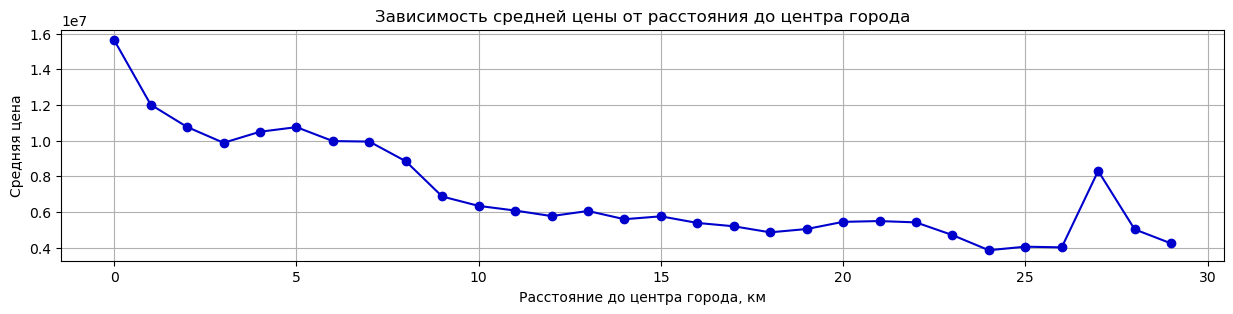

In [78]:
city_center_price.plot(grid=True, style='o-', figsize = (15,3), color = 'mediumblue')
plt.title("Зависимость средней цены от расстояния до центра города")
plt.xlabel("Расстояние до центра города, км")
plt.ylabel("Средняя цена");

В целом график нисходщий, это значит, чем дальше от центра, тем стоимость квадратного метра меньше. До 3-го километра стоимость резко падает, потом до 7 километра плавно возрастает и далее идет на удешевление. Есть пик на 27 км, изучим его.

In [79]:
data.query('locality_name == "Санкт-Петербург" and city_center_distance_km == [27]')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,days_exposition,price_per_meter,week_day_exposition,month_exposition,year_exposition,categorize_floor,city_center_distance_km
748,13,14350000.00,74.00,2017-11-28,2,3.13,5,30.00,3,False,False,False,25.00,0,Санкт-Петербург,23888.00,27313.00,1,1496.00,0,128.00,193918.92,1,11,2017,другой,27.00
5961,6,2250000.00,32.00,2018-02-27,1,NaN,2,16.50,2,False,False,False,7.00,0,Санкт-Петербург,24006.00,27431.00,0,NaN,0,178.00,70312.50,1,2,2018,последний,27.00


In [80]:
data.query('locality_name == "Санкт-Петербург"')['city_center_distance_km'].value_counts()

12.00    1565
15.00    1535
13.00    1433
14.00    1250
16.00    1240
11.00    1137
17.00     840
5.00      812
10.00     700
4.00      637
9.00      576
8.00      572
6.00      534
7.00      370
3.00      327
2.00      259
18.00     255
22.00     202
1.00      164
19.00     153
21.00     116
23.00      82
26.00      43
20.00      38
24.00      26
25.00      26
0.00       19
28.00       7
29.00       6
27.00       2
Name: city_center_distance_km, dtype: int64

А вот и причина выброса на 27 км. Всего 2 квартиры там продавалось, одна из которых выставлена по аномальной цене. Выборка для 27, 28, 29 км очень мала, такие данные можно не включать в анализ. 

Посмотрим на количество квартир разных категорий (первый, последний, другой), которые продаются на 3-м км. и 5-ом и какую долю они занимают на каждом километре, чтобы объяснить пик и провал в центре.

In [81]:
#количество квартир по типу этажа на 3 и 5 километре
data.query('locality_name == "Санкт-Петербург" and city_center_distance_km == [3,5]')\
 .pivot_table(index = 'categorize_floor', columns = 'city_center_distance_km', values = 'days_exposition', aggfunc = 'count')

city_center_distance_km,3.00,5.00
categorize_floor,,
другой,157,525
первый,42,63
последний,60,99


In [82]:
#количество квартир по типу этажа на каждом километре
floor_center = data.query('locality_name == "Санкт-Петербург"')\
 .pivot_table(index = 'city_center_distance_km', columns = 'categorize_floor', values = 'days_exposition', aggfunc = 'count')
floor_center

categorize_floor,другой,первый,последний
city_center_distance_km,,,
0.00,10.00,2.00,2.00
1.00,86.00,20.00,35.00
2.00,121.00,37.00,57.00
3.00,157.00,42.00,60.00
4.00,373.00,63.00,94.00
5.00,525.00,63.00,99.00
6.00,337.00,51.00,63.00
7.00,243.00,23.00,44.00
8.00,392.00,44.00,59.00


In [83]:
#рассчитаем долю
count_km = data.query('locality_name == "Санкт-Петербург"')\
 .pivot_table(index = 'city_center_distance_km', values = 'days_exposition', aggfunc = 'count')

floor_center['всего квартир'] = count_km
floor_center['доля друг.этажа'] = floor_center['другой'] / floor_center['всего квартир']
floor_center['доля первого этажа'] = floor_center['первый'] / floor_center['всего квартир']
floor_center['доля последнего этажа'] = floor_center['последний'] / floor_center['всего квартир']
print(floor_center)

categorize_floor         другой  первый  последний  всего квартир  \
city_center_distance_km                                             
0.00                      10.00    2.00       2.00             14   
1.00                      86.00   20.00      35.00            141   
2.00                     121.00   37.00      57.00            215   
3.00                     157.00   42.00      60.00            259   
4.00                     373.00   63.00      94.00            530   
5.00                     525.00   63.00      99.00            687   
6.00                     337.00   51.00      63.00            451   
7.00                     243.00   23.00      44.00            310   
8.00                     392.00   44.00      59.00            495   
9.00                     380.00   49.00      71.00            500   
10.00                    479.00   57.00      81.00            617   
11.00                    778.00  118.00     102.00            998   
12.00                   1089.00  1

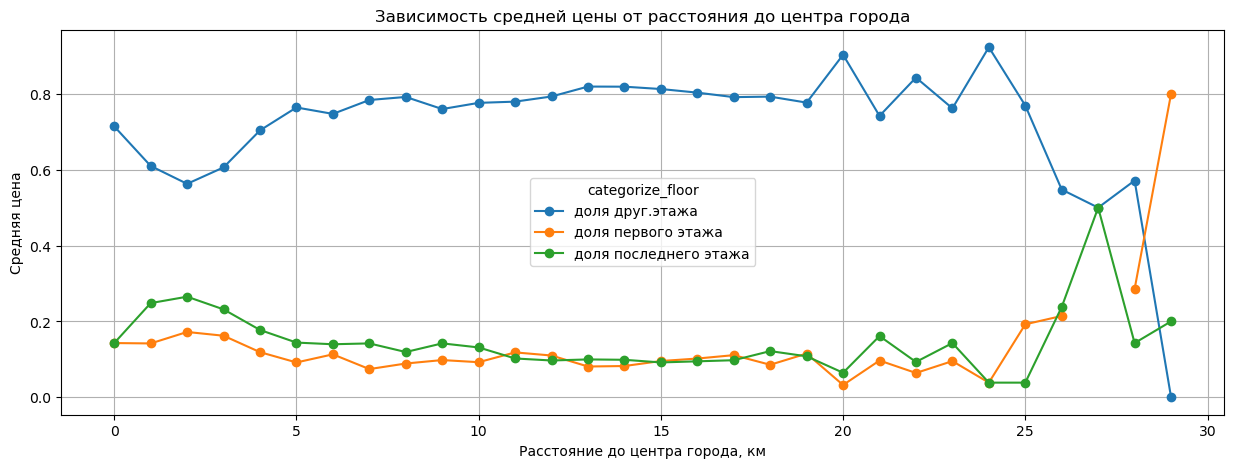

In [84]:
#построим график 
floor_center.loc[:,'доля друг.этажа':'доля последнего этажа']\
            .plot(figsize = (15, 5), grid=True, style='o-')
plt.title("Зависимость средней цены от расстояния до центра города")
plt.xlabel("Расстояние до центра города, км")
plt.ylabel("Средняя цена");

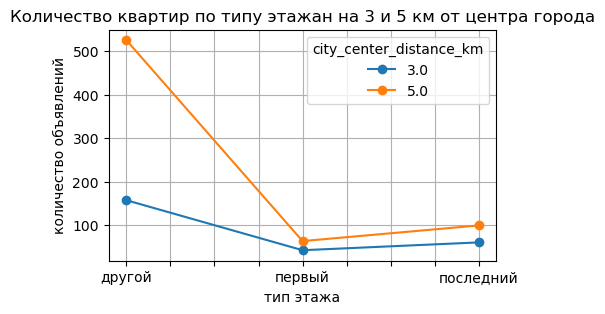

In [85]:
#график количество квартир по типу этажа на 3 и 5 километре
data.query('locality_name == "Санкт-Петербург" and city_center_distance_km == [3,5]')\
    .pivot_table(index = 'categorize_floor', columns = 'city_center_distance_km', values = 'days_exposition', aggfunc = 'count')\
    .plot(grid=True, style='o-', figsize = (5,3))
plt.title("Количество квартир по типу этажан на 3 и 5 км от центра города")
plt.xlabel("тип этажа")
plt.ylabel("количество объявлений");

 После 25 км видим, что количество объявлений стали единичными. Когда выборка большая, четко видно, что большую долю занимают квартиры на средних этажах, что и определяет среднуюю стоимость на каждом км. А после 25 км из-за малой выборки произошли выбросы. На 5-м километре доля квартир на средних этажах больше, чем доля таких квартир на 3-м км. А из анализа выше выяснено, что такие квартира на 10% и 20% дороже, чем квартиры на последнем и первых этажах. Раз их больше, значит и среднее значение будет больше. Что и привело к росту средней цены на 5 километр.

**Выводы:** На этапе исследовательского анализа данных пройдены следующие шаги:
Построены гистограммы и проанализированы количественные значения для выбранных колонок датасета.

Выяснено, что чаще всего квартиры продаются за 45 и за 60 дней. Быстрыми продажами считаются квартиры, проданные менее, чем за 45 дней, в долгими продажами можно считать – более 230 дней.

На стоимость квартиры существенно влияет количество комнат, тип этажа, месяц и год продажи.

Самые дорогие квартиры находятся в Санкт-Петрбурге. Самое больше количество продаваемых квартир тоже находится в Санкт-Петербурге.

Сделан вывод, что в Санкт-Петербурге чем дальше квартира расположена от центра, тем стоимость его квадратного метра уменьшается.

## Общий вывод

Был изучен датасет сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 

На этапе предобработки данных определены пропущенные значения, заполнены пропущенные значения там, где это возможно, измененые типы данных там, где это было необходимо, устранены неявные дубликаты в названиях населённых пунктов, устранены редкие и выбивающиеся значения (аномалии) во всех столбцах.

Расчитаны и добавлены в таблицу некоторые значения для дальнейшего использования в анализе.

На основе анализы были сделаны следующие выводы:

- чаще всего продаются 1-2-3 комнатные квартиры на 1-5 этаже в Санкт-Петербурге;
- количество продаж зависит от сезонности;
- стоимость квартиры зависит от количества комнат, типа этажа, месяца продажи, года продажи, расположения.